$$
\def\CC{\bf C}
\def\QQ{\bf Q}
\def\RR{\bf R}
\def\ZZ{\bf Z}
\def\NN{\bf N}
$$
# NumPy: the absolute basics for beginners

SOURCE https://numpy.org/devdocs/user/absolute_beginners.html#how-to-save-and-load-numpy-objects

Welcome to the absolute beginner's guide to NumPy!

NumPy (**Num**erical **Py**thon) is an open source Python library that's
widely used in science and engineering. The NumPy library contains
multidimensional array data structures, such as the homogeneous,
N-dimensional `ndarray`, and a large library of functions that operate
efficiently on these data structures. Learn more about NumPy at [What is
NumPy](whatisnumpy.ipynb), and if you have comments or suggestions,
please [reach out](https://numpy.org/community/)!

## How to import NumPy

After [installing NumPy](https://numpy.org/install/), it may be imported
into Python code like:

In [3]:
import numpy as np

This widespread convention allows access to NumPy features with a short,
recognizable prefix (`np.`) while distinguishing NumPy features from
others that have the same name.

## Reading the example code

Throughout the NumPy documentation, you will find blocks that look like:

In [82]:
a = np.array([[1, 2, 3],
              [4, 5, 6]])
a.shape

(2, 3)

Text preceded by `>>>` or `...` is **input**, the code that you would
enter in a script or at a Python prompt. Everything else is **output**,
the results of running your code. Note that `>>>` and `...` are not part
of the code and may cause an error if entered at a Python prompt.

## Why use NumPy?

Python lists are excellent, general-purpose containers. They can be
"heterogeneous", meaning that they can contain elements of a variety of
types, and they are quite fast when used to perform individual
operations on a handful of elements.

Depending on the characteristics of the data and the types of operations
that need to be performed, other containers may be more appropriate; by
exploiting these characteristics, we can improve speed, reduce memory
consumption, and offer a high-level syntax for performing a variety of
common processing tasks. NumPy shines when there are large quantities of
"homogeneous" (same-type) data to be processed on the CPU.

## What is an "array"?

In computer programming, an array is a structure for storing and
retrieving data. We often talk about an array as if it were a grid in
space, with each cell storing one element of the data. For instance, if
each element of the data were a number, we might visualize a
"one-dimensional" array like a list:

$$\begin{aligned}
\begin{array}{|c||c|c|c|}
\hline
1 & 5 & 2 & 0 \\
\hline
\end{array}
\end{aligned}$$

A two-dimensional array would be like a table:

$$\begin{aligned}
\begin{array}{|c||c|c|c|}
\hline
1 & 5 & 2 & 0 \\
\hline
8 & 3 & 6 & 1 \\
\hline
1 & 7 & 2 & 9 \\
\hline
\end{array}
\end{aligned}$$

A three-dimensional array would be like a set of tables, perhaps stacked
as though they were printed on separate pages. In NumPy, this idea is
generalized to an arbitrary number of dimensions, and so the fundamental
array class is called `ndarray` : it represents an "N-dimensional
array".

Most NumPy arrays have some restrictions. For instance:

-   All elements of the array must be of the same type of data.
-   Once created, the total size of the the array can't change.
-   The shape must be "rectangular", not "jagged"; e.g., each row of a
    two-dimensional array must have the same number of columns.

When these conditions are met, NumPy exploits these characteristics to
make the array faster, more memory efficient, and more convenient to use
than less restrictive data structures.

For the remainder of this document, we will use the word "array" to
refer to an instance of `ndarray`.

## Array fundamentals

One way to initialize an array is using a Python sequence, such as a
list. For example:

In [83]:
a = np.array([1, 2, 3, 4, 5, 6])
a

array([1, 2, 3, 4, 5, 6])

Elements of an array can be accessed in `various ways
<quickstart.indexing-slicing-and-iterating>`. For instance, we can
access an individual element of this array as we would access an element
in the original list: using the integer index of the element within
square brackets.

> \>\>\> a\[0\] 1

<div class="note">

<div class="title">

Note

</div>

As with built-in Python sequences, NumPy arrays are "0-indexed": the
first element of the array is accessed using index `0`, not `1`.

</div>

Like the original list, the array is mutable.

> \>\>\> a\[0\] = 10 \>\>\> a array(\[10, 2, 3, 4, 5, 6\])

Also like the original list, Python slice notation can be used for
indexing.

> \>\>\> a\[:3\] array(\[10, 2, 3\])

One major difference is that slice indexing of a list copies the
elements into a new list, but slicing an array returns a *view*: an
object that refers to the data in the original array. The original array
can be mutated using the view.

> \>\>\> b = a\[3:\] \>\>\> b array(\[4, 5, 6\]) \>\>\> b\[0\] = 40
> \>\>\> a array(\[ 10, 2, 3, 40, 5, 6\])

See `basics.copies-and-views` for a more comprehensive explanation of
when array operations return views rather than copies.

Two- and higher-dimensional arrays can be initialized from nested Python
sequences:

In [84]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In NumPy, a dimension of an array is sometimes referred to as an "axis".
This terminology may be useful to disambiguate between the
dimensionality of an array and the dimensionality of the data
represented by the array. For instance, the array `a` could represent
three points, each lying within a four-dimensional space, but `a` has
only two "axes".

Another difference between an array and a list of lists is that an
element of the array can be accessed by specifying the index along each
axis within a *single* set of square brackets, separated by commas. For
instance, the element `8` is in row `1` and column `3` :

> \>\>\> a\[1, 3\] 8

<div class="note">

<div class="title">

Note

</div>

It is familiar practice in mathematics to refer to elements of a matrix
by the row index first and the column index second. This happens to be
true for two-dimensional arrays, but a better mental model is to think
of the column index as coming *last* and the row index as *second to
last*. This generalizes to arrays with *any* number of dimensions.

</div>

<div class="note">

<div class="title">

Note

</div>

You might hear of a 0-D (zero-dimensional) array referred to as a
"scalar", a 1-D (one-dimensional) array as a "vector", a 2-D
(two-dimensional) array as a "matrix", or an N-D (N-dimensional, where
"N" is typically an integer greater than 2) array as a "tensor". For
clarity, it is best to avoid the mathematical terms when referring to an
array because the mathematical objects with these names behave
differently than arrays (e.g. "matrix" multiplication is fundamentally
different from "array" multiplication), and there are other objects in
the scientific Python ecosystem that have these names (e.g. the
fundamental data structure of PyTorch is the "tensor").

</div>

## Array attributes

*This section covers the* `ndim`, `shape`, `size`, *and* `dtype`
*attributes of an array*.

------------------------------------------------------------------------

The number of dimensions of an array is contained in the `ndim`
attribute.

> \>\>\> a.ndim 2

The shape of an array is a tuple of non-negative integers that specify
the number of elements along each dimension.

> \>\>\> a.shape (3, 4) \>\>\> len(a.shape) == a.ndim True

The fixed, total number of elements in array is contained in the `size`
attribute.

> \>\>\> a.size 12 \>\>\> import math \>\>\> a.size ==
> math.prod(a.shape) True

Arrays are typically "homogeneous", meaning that they contain elements
of only one "data type". The data type is recorded in the `dtype`
attribute.

> \>\>\> a.dtype dtype('int64') \# "int" for integer, "64" for 64-bit

ref:$Read more about array attributes here <arrays.ndarray>$ and learn
about [array objects here](arrays.ipynb).

## How to create a basic array

*This section covers* `np.zeros()`, `np.ones()`, `np.empty()`,
`np.arange()`, `np.linspace()`

------------------------------------------------------------------------

Besides creating an array from a sequence of elements, you can easily
create an array filled with `0`'s:

In [85]:
np.zeros(2)

array([0., 0.])

Or an array filled with `1`'s:

In [86]:
np.ones(2)

array([1., 1.])

Or even an empty array! The function `empty` creates an array whose
initial content is random and depends on the state of the memory. The
reason to use `empty` over `zeros` (or something similar) is speed -
just make sure to fill every element afterwards! :

In [87]:
# Create an empty array with 2 elements
np.empty(2) #doctest: +SKIP

array([1., 1.])

You can create an array with a range of elements:

In [88]:
np.arange(4)

array([0, 1, 2, 3])

And even an array that contains a range of evenly spaced intervals. To
do this, you will specify the **first number**, **last number**, and the
**step size**. :

In [89]:
np.arange(2, 9, 2)

array([2, 4, 6, 8])

You can also use `np.linspace()` to create an array with values that are
spaced linearly in a specified interval:

In [90]:
np.linspace(0, 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

**Specifying your data type**

While the default data type is floating point (`np.float64`), you can
explicitly specify which data type you want using the `dtype` keyword. :

In [91]:
x = np.ones(2, dtype=np.int64)
x

array([1, 1])

`Learn more about creating arrays here <quickstart.array-creation>`

## Adding, removing, and sorting elements

*This section covers* `np.sort()`, `np.concatenate()`

------------------------------------------------------------------------

Sorting an element is simple with `np.sort()`. You can specify the axis,
kind, and order when you call the function.

If you start with this array:

In [92]:
arr = np.array([2, 1, 5, 3, 7, 4, 6, 8])

You can quickly sort the numbers in ascending order with:

In [93]:
np.sort(arr)

array([1, 2, 3, 4, 5, 6, 7, 8])

In addition to sort, which returns a sorted copy of an array, you can
use:

-   $argsort$, which is an indirect sort along a specified axis,
-   $lexsort$, which is an indirect stable sort on multiple keys,
-   $searchsorted$, which will find elements in a sorted array, and
-   $partition$, which is a partial sort.

To read more about sorting an array, see: $sort$.

If you start with these arrays:

In [94]:
a = np.array([1, 2, 3, 4])
b = np.array([5, 6, 7, 8])

You can concatenate them with `np.concatenate()`. :

In [95]:
np.concatenate((a, b))

array([1, 2, 3, 4, 5, 6, 7, 8])

Or, if you start with these arrays:

In [96]:
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6]])

You can concatenate them with:

In [97]:
np.concatenate((x, y), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In order to remove elements from an array, it's simple to use indexing
to select the elements that you want to keep.

To read more about concatenate, see: $concatenate$.

## How do you know the shape and size of an array?

*This section covers* `ndarray.ndim`, `ndarray.size`, `ndarray.shape`

------------------------------------------------------------------------

`ndarray.ndim` will tell you the number of axes, or dimensions, of the
array.

`ndarray.size` will tell you the total number of elements of the array.
This is the *product* of the elements of the array's shape.

`ndarray.shape` will display a tuple of integers that indicate the
number of elements stored along each dimension of the array. If, for
example, you have a 2-D array with 2 rows and 3 columns, the shape of
your array is `(2, 3)`.

For example, if you create this array:

In [98]:
array_example = np.array([[[0, 1, 2, 3],
                           [4, 5, 6, 7]],

                          [[0, 1, 2, 3],
                           [4, 5, 6, 7]],

                          [[0 ,1 ,2, 3],
                           [4, 5, 6, 7]]])

To find the number of dimensions of the array, run:

In [99]:
array_example.ndim

3

To find the total number of elements in the array, run:

In [100]:
array_example.size

24

And to find the shape of your array, run:

In [101]:
array_example.shape

(3, 2, 4)

## Can you reshape an array?

*This section covers* `arr.reshape()`

------------------------------------------------------------------------

**Yes!**

Using `arr.reshape()` will give a new shape to an array without changing
the data. Just remember that when you use the reshape method, the array
you want to produce needs to have the same number of elements as the
original array. If you start with an array with 12 elements, you'll need
to make sure that your new array also has a total of 12 elements.

If you start with this array:

In [102]:
a = np.arange(6)
print(a)

[0 1 2 3 4 5]


You can use `reshape()` to reshape your array. For example, you can
reshape this array to an array with three rows and two columns:

In [103]:
b = a.reshape(3, 2)
print(b)

[[0 1]
 [2 3]
 [4 5]]


With `np.reshape`, you can specify a few optional parameters:

In [104]:
np.reshape(a, newshape=(1, 6), order='C')

array([[0, 1, 2, 3, 4, 5]])

`a` is the array to be reshaped.

`newshape` is the new shape you want. You can specify an integer or a
tuple of integers. If you specify an integer, the result will be an
array of that length. The shape should be compatible with the original
shape.

`order:` `C` means to read/write the elements using C-like index order,
`F` means to read/write the elements using Fortran-like index order, `A`
means to read/write the elements in Fortran-like index order if a is
Fortran contiguous in memory, C-like order otherwise. (This is an
optional parameter and doesn't need to be specified.)

If you want to learn more about C and Fortran order, you can [read more
about the internal organization of NumPy arrays
here](numpy-internals.ipynb). Essentially, C and Fortran orders have to
do with how indices correspond to the order the array is stored in
memory. In Fortran, when moving through the elements of a
two-dimensional array as it is stored in memory, the **first** index is
the most rapidly varying index. As the first index moves to the next row
as it changes, the matrix is stored one column at a time. This is why
Fortran is thought of as a **Column-major language**. In C on the other
hand, the **last** index changes the most rapidly. The matrix is stored
by rows, making it a **Row-major language**. What you do for C or
Fortran depends on whether it's more important to preserve the indexing
convention or not reorder the data.

`Learn more about shape manipulation here <quickstart.shape-manipulation>`.

## How to convert a 1D array into a 2D array (how to add a new axis to an array)

*This section covers* `np.newaxis`, `np.expand_dims`

------------------------------------------------------------------------

You can use `np.newaxis` and `np.expand_dims` to increase the dimensions
of your existing array.

Using `np.newaxis` will increase the dimensions of your array by one
dimension when used once. This means that a **1D** array will become a
**2D** array, a **2D** array will become a **3D** array, and so on.

For example, if you start with this array:

In [105]:
a = np.array([1, 2, 3, 4, 5, 6])
a.shape

(6,)

You can use `np.newaxis` to add a new axis:

In [106]:
a2 = a[np.newaxis, :]
a2.shape

(1, 6)

You can explicitly convert a 1D array to either a row vector or a column
vector using `np.newaxis`. For example, you can convert a 1D array to a
row vector by inserting an axis along the first dimension:

In [107]:
row_vector = a[np.newaxis, :]
row_vector.shape

(1, 6)

Or, for a column vector, you can insert an axis along the second
dimension:

In [108]:
col_vector = a[:, np.newaxis]
col_vector.shape

(6, 1)

You can also expand an array by inserting a new axis at a specified
position with `np.expand_dims`.

For example, if you start with this array:

In [109]:
a = np.array([1, 2, 3, 4, 5, 6])
a.shape

(6,)

You can use `np.expand_dims` to add an axis at index position 1 with:

In [110]:
b = np.expand_dims(a, axis=1)
b.shape

(6, 1)

You can add an axis at index position 0 with:

In [111]:
c = np.expand_dims(a, axis=0)
c.shape

(1, 6)

Find more information about `newaxis here <arrays.indexing>` and
`expand_dims` at $expand_dims$.

## Indexing and slicing

You can index and slice NumPy arrays in the same ways you can slice
Python lists. :

In [112]:
data = np.array([1, 2, 3])

In [113]:
data[1]

2

In [114]:
data[0:2]

array([1, 2])

In [115]:
data[1:]

array([2, 3])

In [116]:
data[-2:]

array([2, 3])

In [120]:
from IPython.display import Image

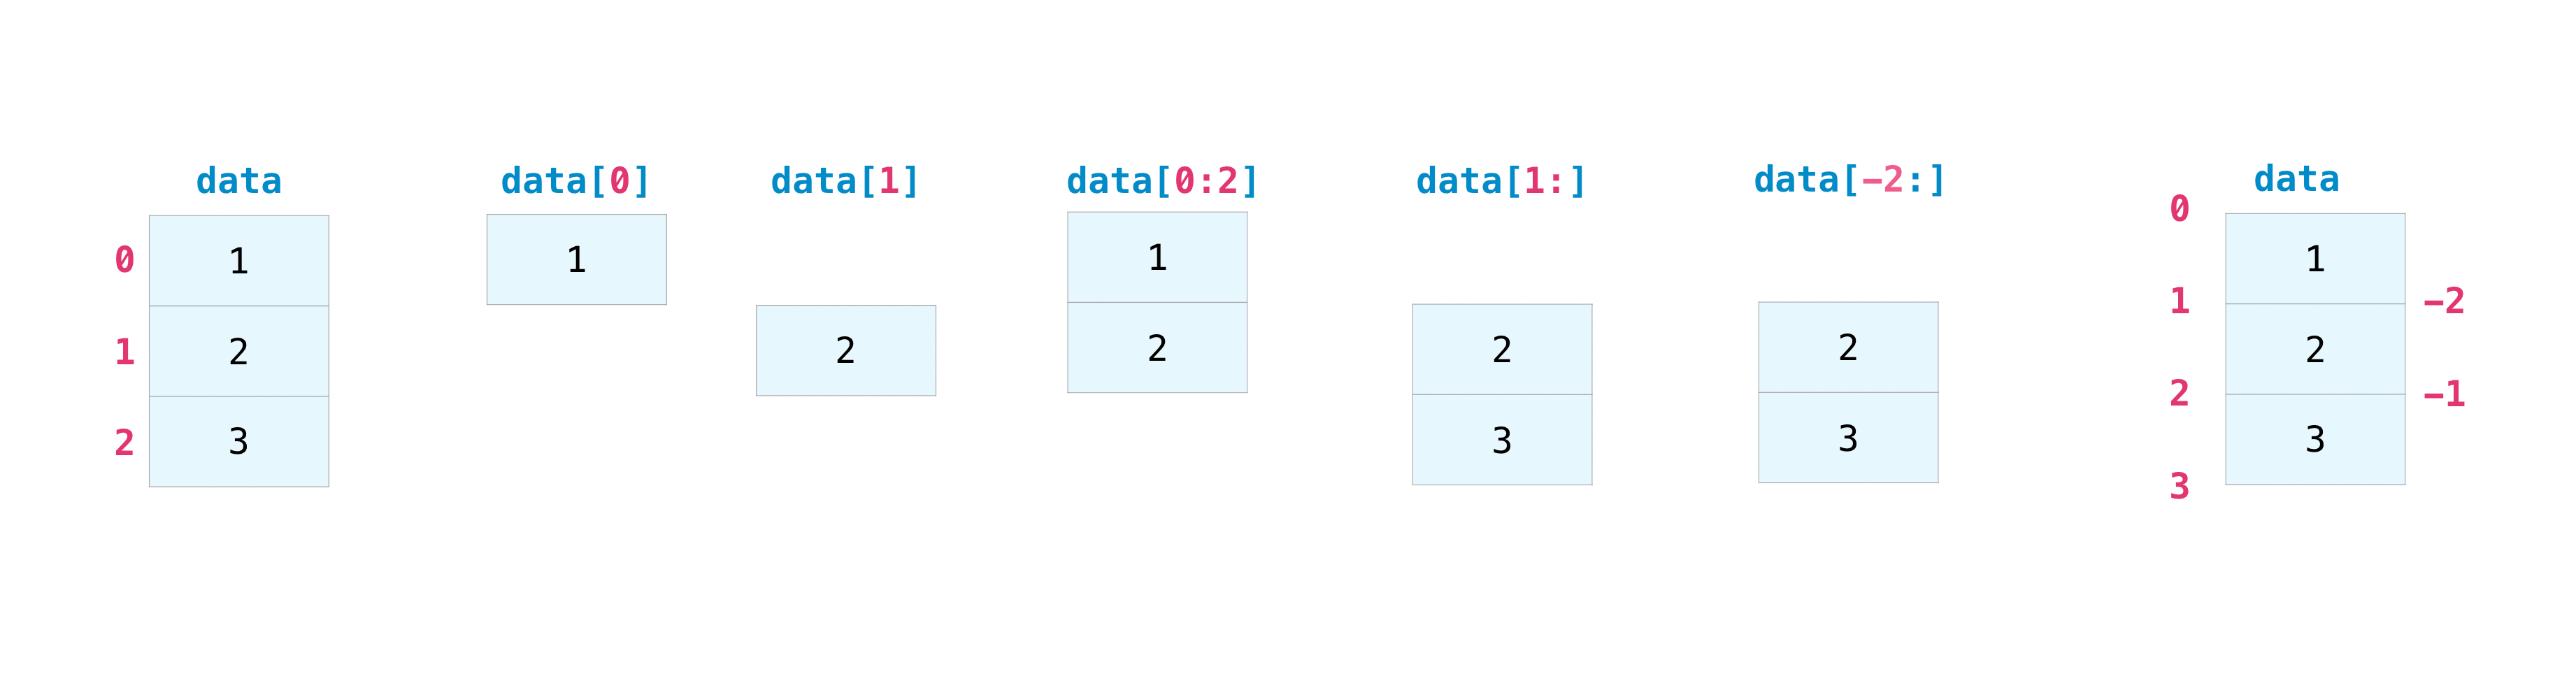

In [122]:
# You can visualize it this way:
 
Image(filename='../figures/numpy/np_indexing.png') 


You may want to take a section of your array or specific array elements
to use in further analysis or additional operations. To do that, you'll
need to subset, slice, and/or index your arrays.

If you want to select values from your array that fulfill certain
conditions, it's straightforward with NumPy.

For example, if you start with this array:

In [123]:
a = np.array([[1 , 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

You can easily print all of the values in the array that are less than
5. :

In [124]:
print(a[a < 5])

[1 2 3 4]


You can also select, for example, numbers that are equal to or greater
than 5, and use that condition to index an array. :

In [125]:
five_up = (a >= 5)
print(a[five_up])

[ 5  6  7  8  9 10 11 12]


You can select elements that are divisible by 2:

In [126]:
divisible_by_2 = a[a%2==0]
print(divisible_by_2)

[ 2  4  6  8 10 12]


Or you can select elements that satisfy two conditions using the `&` and
`|` operators:

In [127]:
c = a[(a > 2) & (a < 11)]
print(c)

[ 3  4  5  6  7  8  9 10]


You can also make use of the logical operators **&** and **\|** in order
to return boolean values that specify whether or not the values in an
array fulfill a certain condition. This can be useful with arrays that
contain names or other categorical values. :

In [128]:
five_up = (a > 5) | (a == 5)
print(five_up)

[[False False False False]
 [ True  True  True  True]
 [ True  True  True  True]]


You can also use `np.nonzero()` to select elements or indices from an
array.

Starting with this array:

In [129]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

You can use `np.nonzero()` to print the indices of elements that are,
for example, less than 5:

In [130]:
b = np.nonzero(a < 5)
print(b)

(array([0, 0, 0, 0]), array([0, 1, 2, 3]))


In this example, a tuple of arrays was returned: one for each dimension.
The first array represents the row indices where these values are found,
and the second array represents the column indices where the values are
found.

If you want to generate a list of coordinates where the elements exist,
you can zip the arrays, iterate over the list of coordinates, and print
them. For example:

In [131]:
list_of_coordinates= list(zip(b[0], b[1]))

In [132]:
for coord in list_of_coordinates:
    print(coord)

(0, 0)
(0, 1)
(0, 2)
(0, 3)


You can also use `np.nonzero()` to print the elements in an array that
are less than 5 with:

In [133]:
print(a[b])

[1 2 3 4]


If the element you're looking for doesn't exist in the array, then the
returned array of indices will be empty. For example:

In [134]:
not_there = np.nonzero(a == 42)
print(not_there)

(array([], dtype=int64), array([], dtype=int64))


Learn more about
`indexing and slicing here <quickstart.indexing-slicing-and-iterating>`
and `here <basics.indexing>`.

Read more about using the nonzero function at: $nonzero$.

## How to create an array from existing data

*This section covers* `slicing and indexing`, `np.vstack()`,
`np.hstack()`, `np.hsplit()`, `.view()`, `copy()`

------------------------------------------------------------------------

You can easily create a new array from a section of an existing array.

Let's say you have this array:

In [135]:
a = np.array([1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

You can create a new array from a section of your array any time by
specifying where you want to slice your array. :

In [136]:
arr1 = a[3:8]
arr1

array([4, 5, 6, 7, 8])

Here, you grabbed a section of your array from index position 3 through
index position 8.

You can also stack two existing arrays, both vertically and
horizontally. Let's say you have two arrays, `a1` and `a2` :

In [137]:
a1 = np.array([[1, 1],
               [2, 2]])

In [138]:
a2 = np.array([[3, 3],
               [4, 4]])

You can stack them vertically with `vstack` :

In [139]:
np.vstack((a1, a2))

array([[1, 1],
       [2, 2],
       [3, 3],
       [4, 4]])

Or stack them horizontally with `hstack` :

In [140]:
np.hstack((a1, a2))

array([[1, 1, 3, 3],
       [2, 2, 4, 4]])

You can split an array into several smaller arrays using `hsplit`. You
can specify either the number of equally shaped arrays to return or the
columns *after* which the division should occur.

Let's say you have this array:

In [141]:
x = np.arange(1, 25).reshape(2, 12)
x

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])

If you wanted to split this array into three equally shaped arrays, you
would run:

In [142]:
np.hsplit(x, 3)

[array([[ 1,  2,  3,  4],
        [13, 14, 15, 16]]),
 array([[ 5,  6,  7,  8],
        [17, 18, 19, 20]]),
 array([[ 9, 10, 11, 12],
        [21, 22, 23, 24]])]

If you wanted to split your array after the third and fourth column,
you'd run:

In [143]:
np.hsplit(x, (3, 4))

[array([[ 1,  2,  3],
        [13, 14, 15]]),
 array([[ 4],
        [16]]),
 array([[ 5,  6,  7,  8,  9, 10, 11, 12],
        [17, 18, 19, 20, 21, 22, 23, 24]])]

`Learn more about stacking and splitting arrays here <quickstart.stacking-arrays>`.

You can use the `view` method to create a new array object that looks at
the same data as the original array (a *shallow copy*).

Views are an important NumPy concept! NumPy functions, as well as
operations like indexing and slicing, will return views whenever
possible. This saves memory and is faster (no copy of the data has to be
made). However it's important to be aware of this - modifying data in a
view also modifies the original array!

Let's say you create this array:

In [144]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

Now we create an array `b1` by slicing `a` and modify the first element
of `b1`. This will modify the corresponding element in `a` as well! :

In [145]:
b1 = a[0, :]
b1

array([1, 2, 3, 4])

In [146]:
b1[0] = 99
b1

array([99,  2,  3,  4])

In [147]:
a

array([[99,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

Using the `copy` method will make a complete copy of the array and its
data (a *deep copy*). To use this on your array, you could run:

In [148]:
b2 = a.copy()

`Learn more about copies and views here <quickstart.copies-and-views>`.

## Basic array operations

*This section covers addition, subtraction, multiplication, division,
and more*

------------------------------------------------------------------------

Once you've created your arrays, you can start to work with them. Let's
say, for example, that you've created two arrays, one called "data" and
one called "ones"

 

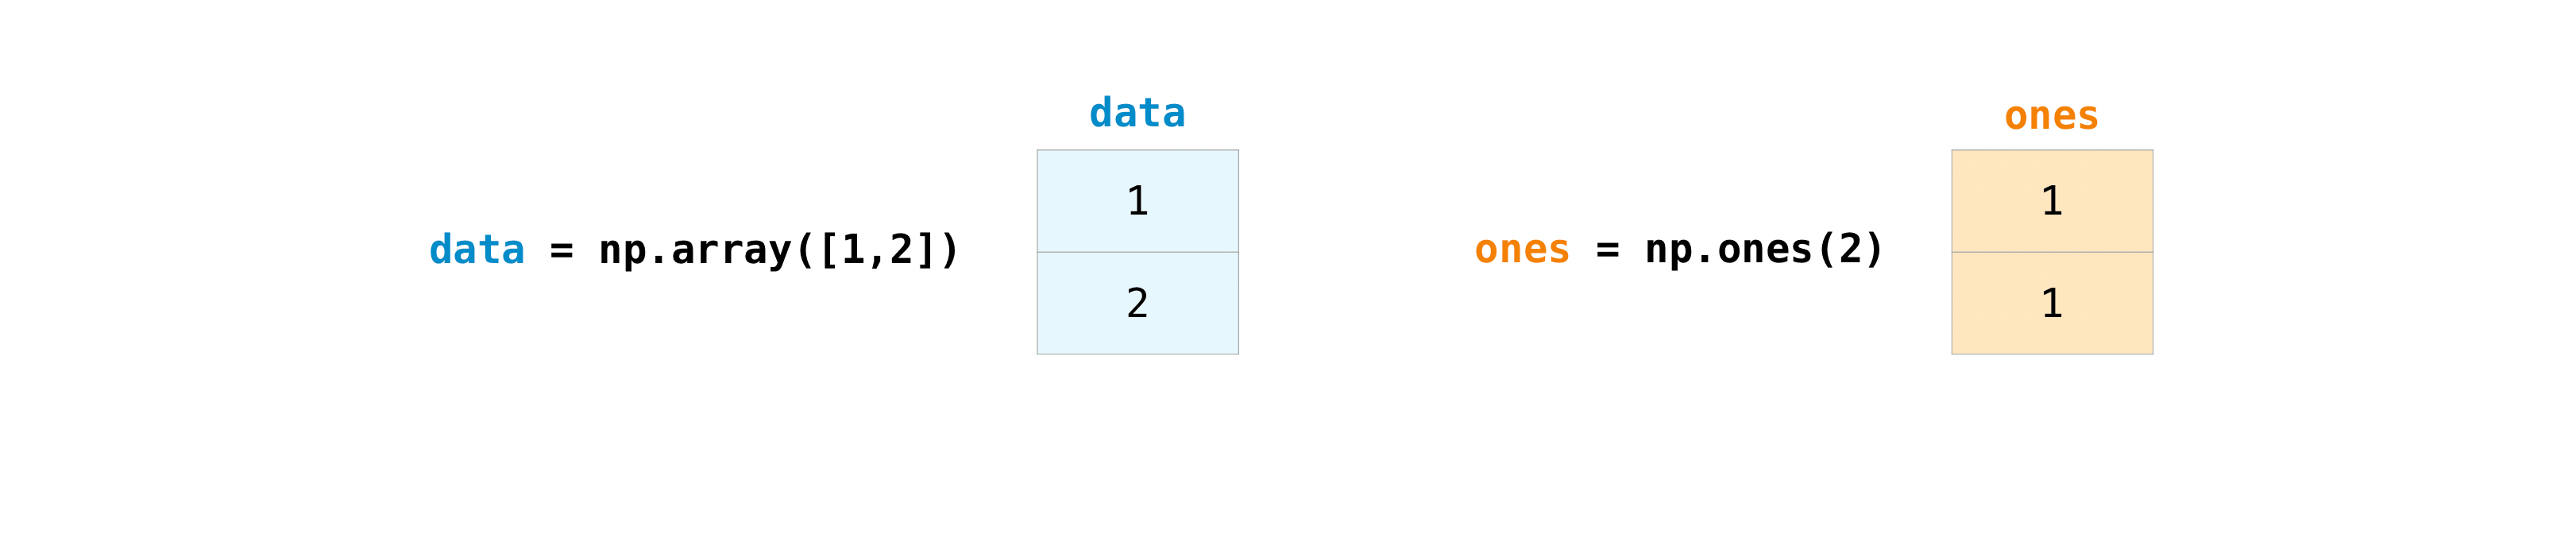

In [153]:
Image('../figures/numpy/np_array_dataones.png')

# You can add the arrays together with the plus sign.

In [154]:
data = np.array([1, 2])
ones = np.ones(2, dtype=int)
data + ones

array([2, 3])

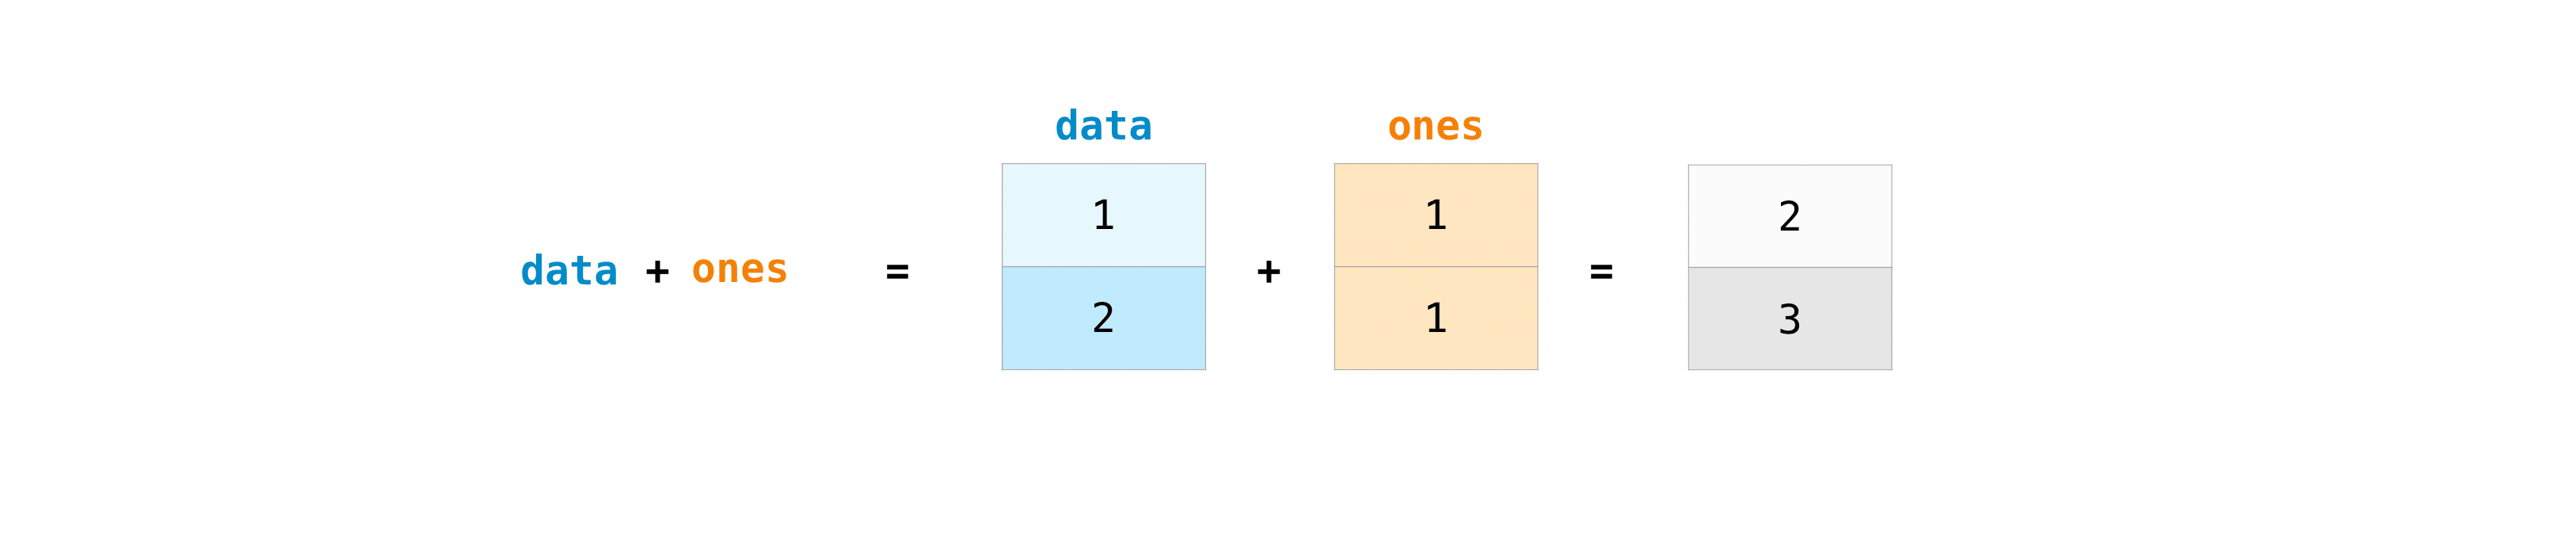

In [156]:
Image('../figures/numpy/np_data_plus_ones.png') 

# You can, of course, do more than just addition!

In [157]:
data - ones

array([0, 1])

In [158]:
data * data

array([1, 4])

In [68]:
data / data

array([1., 1.])

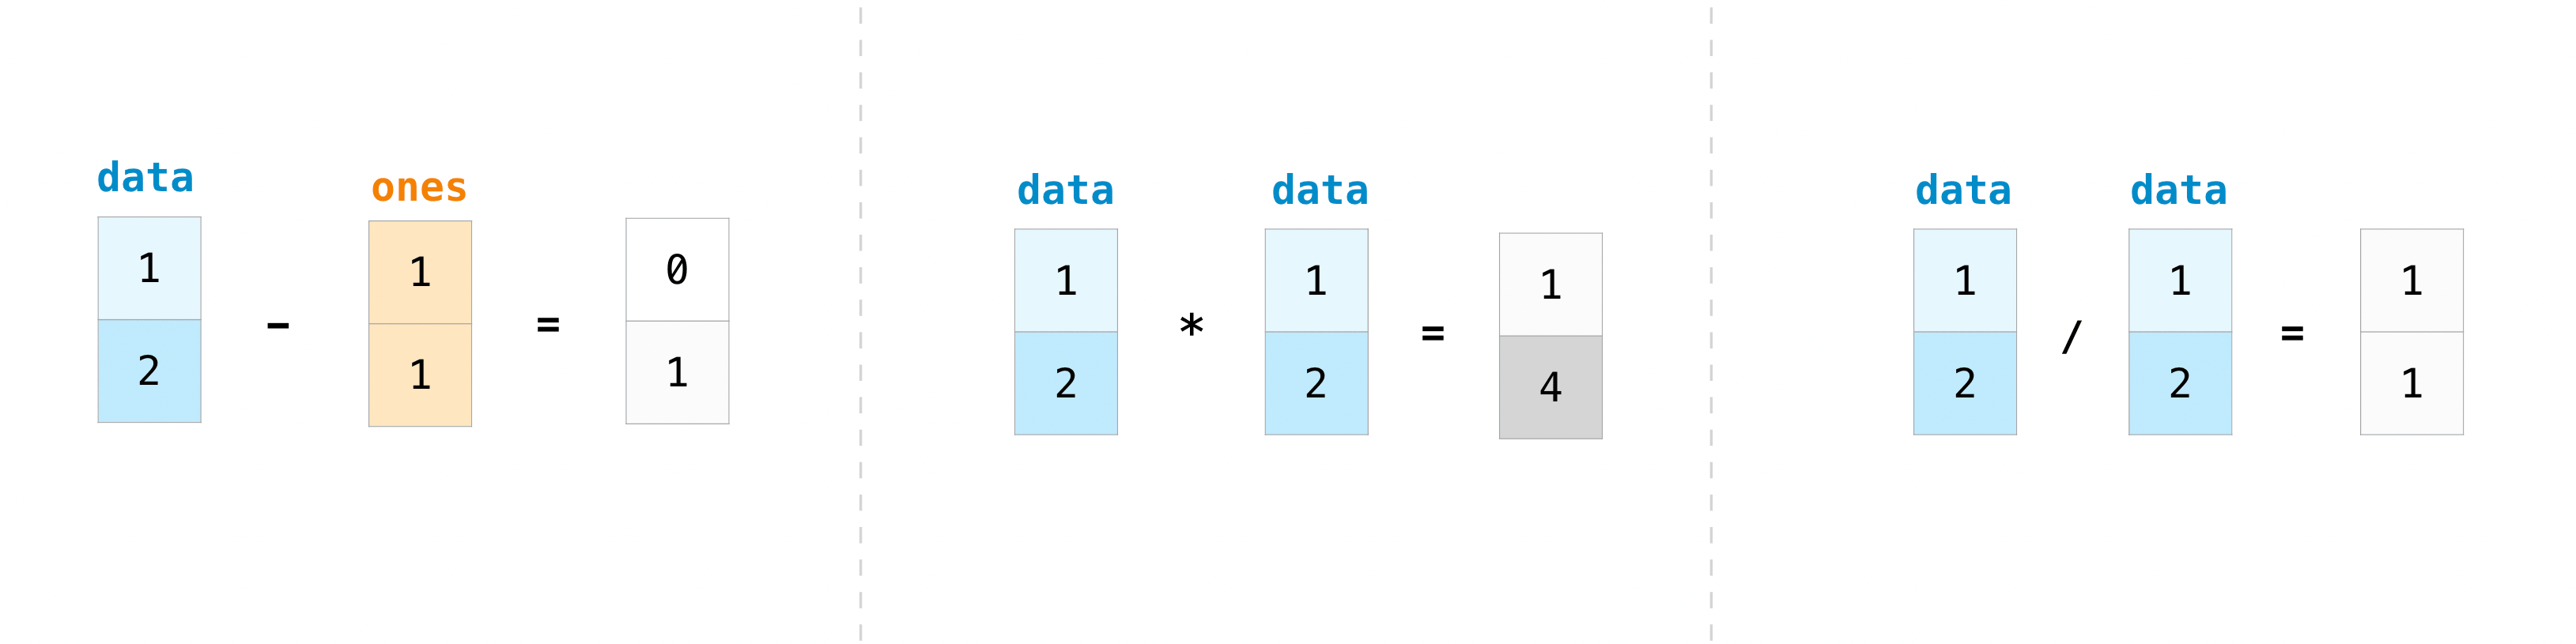

In [159]:
Image('../figures/numpy/np_sub_mult_divide.png') 

# Basic operations are simple with NumPy. If you want to find the sum of
# the elements in an array, you'd use `sum()`. This works for 1D arrays,
# 2D arrays, and arrays in higher dimensions. :

In [160]:
a = np.array([1, 2, 3, 4])

In [161]:
a.sum()

10

To add the rows or the columns in a 2D array, you would specify the
axis.

If you start with this array:

In [162]:
b = np.array([[1, 1], [2, 2]])

You can sum over the axis of rows with:

In [163]:
b.sum(axis=0)

array([3, 3])

You can sum over the axis of columns with:

In [164]:
b.sum(axis=1)

array([2, 4])

`Learn more about basic operations here <quickstart.basic-operations>`.

## Broadcasting

There are times when you might want to carry out an operation between an
array and a single number (also called *an operation between a vector
and a scalar*) or between arrays of two different sizes. For example,
your array (we'll call it "data") might contain information about
distance in miles but you want to convert the information to kilometers.
You can perform this operation with:

In [166]:
data = np.array([1.0, 2.0])
data * 1.6

array([1.6, 3.2])

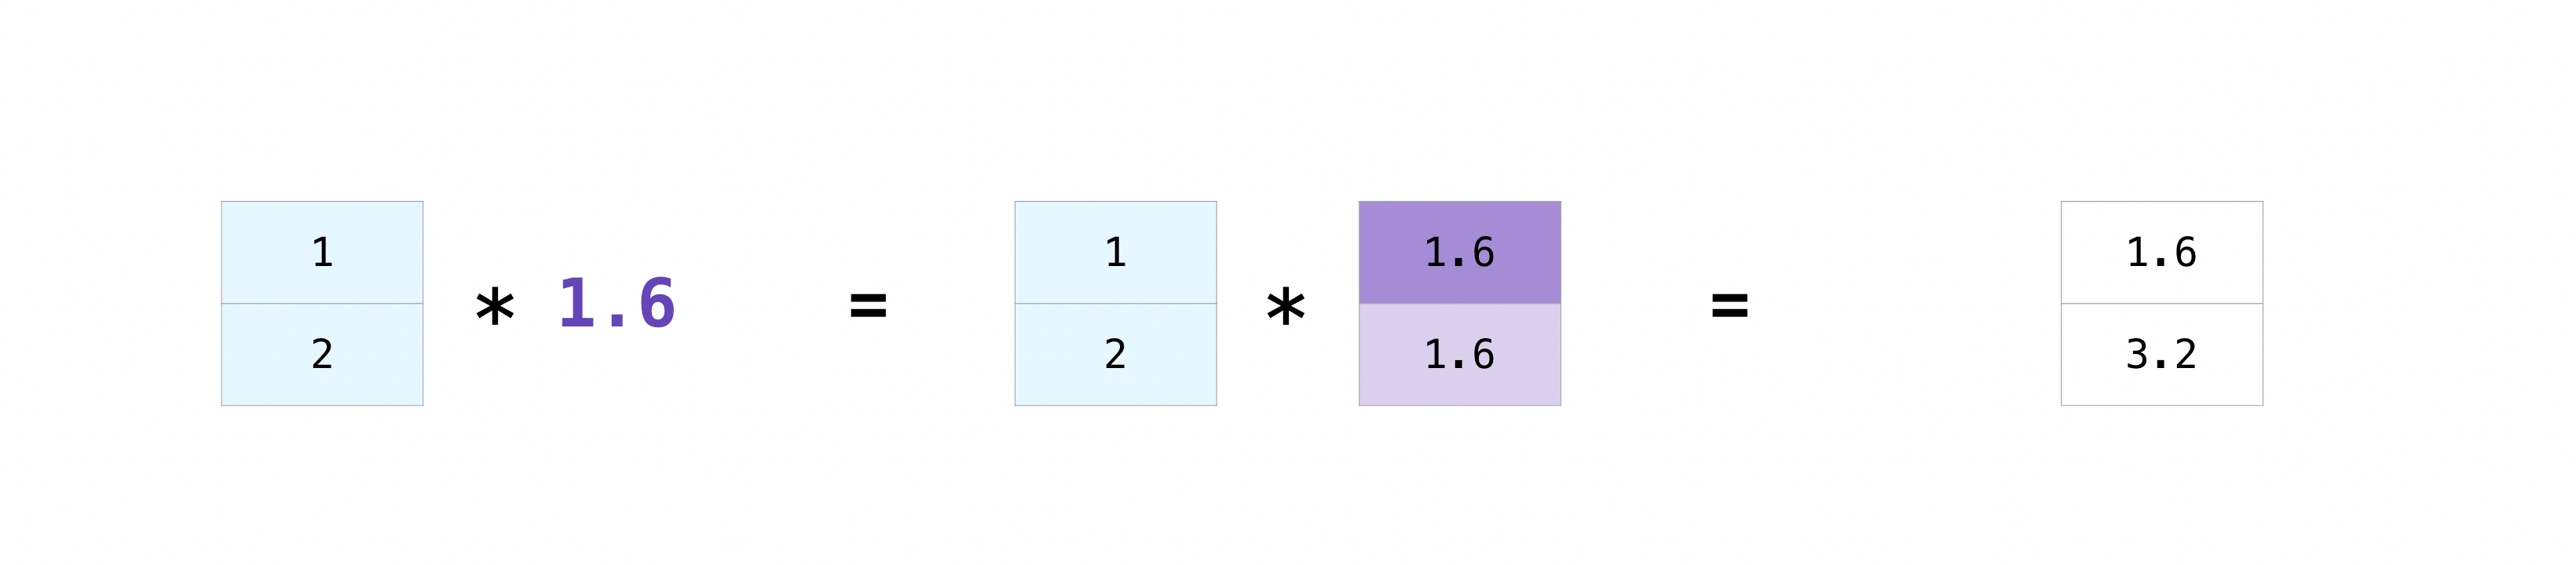

In [167]:
Image('../figures/numpy/np_multiply_broadcasting.png') 

NumPy understands that the multiplication should happen with each cell.
That concept is called **broadcasting**. Broadcasting is a mechanism
that allows NumPy to perform operations on arrays of different shapes.
The dimensions of your array must be compatible, for example, when the
dimensions of both arrays are equal or when one of them is 1. If the
dimensions are not compatible, you will get a `ValueError`.

`Learn more about broadcasting here <basics.broadcasting>`.

## More useful array operations

*This section covers maximum, minimum, sum, mean, product, standard
deviation, and more*

------------------------------------------------------------------------

NumPy also performs aggregation functions. In addition to `min`, `max`,
and `sum`, you can easily run `mean` to get the average, `prod` to get
the result of multiplying the elements together, `std` to get the
standard deviation, and more. :

In [168]:
data.max()

2.0

In [169]:
data.min()

1.0

In [170]:
data.sum()

3.0

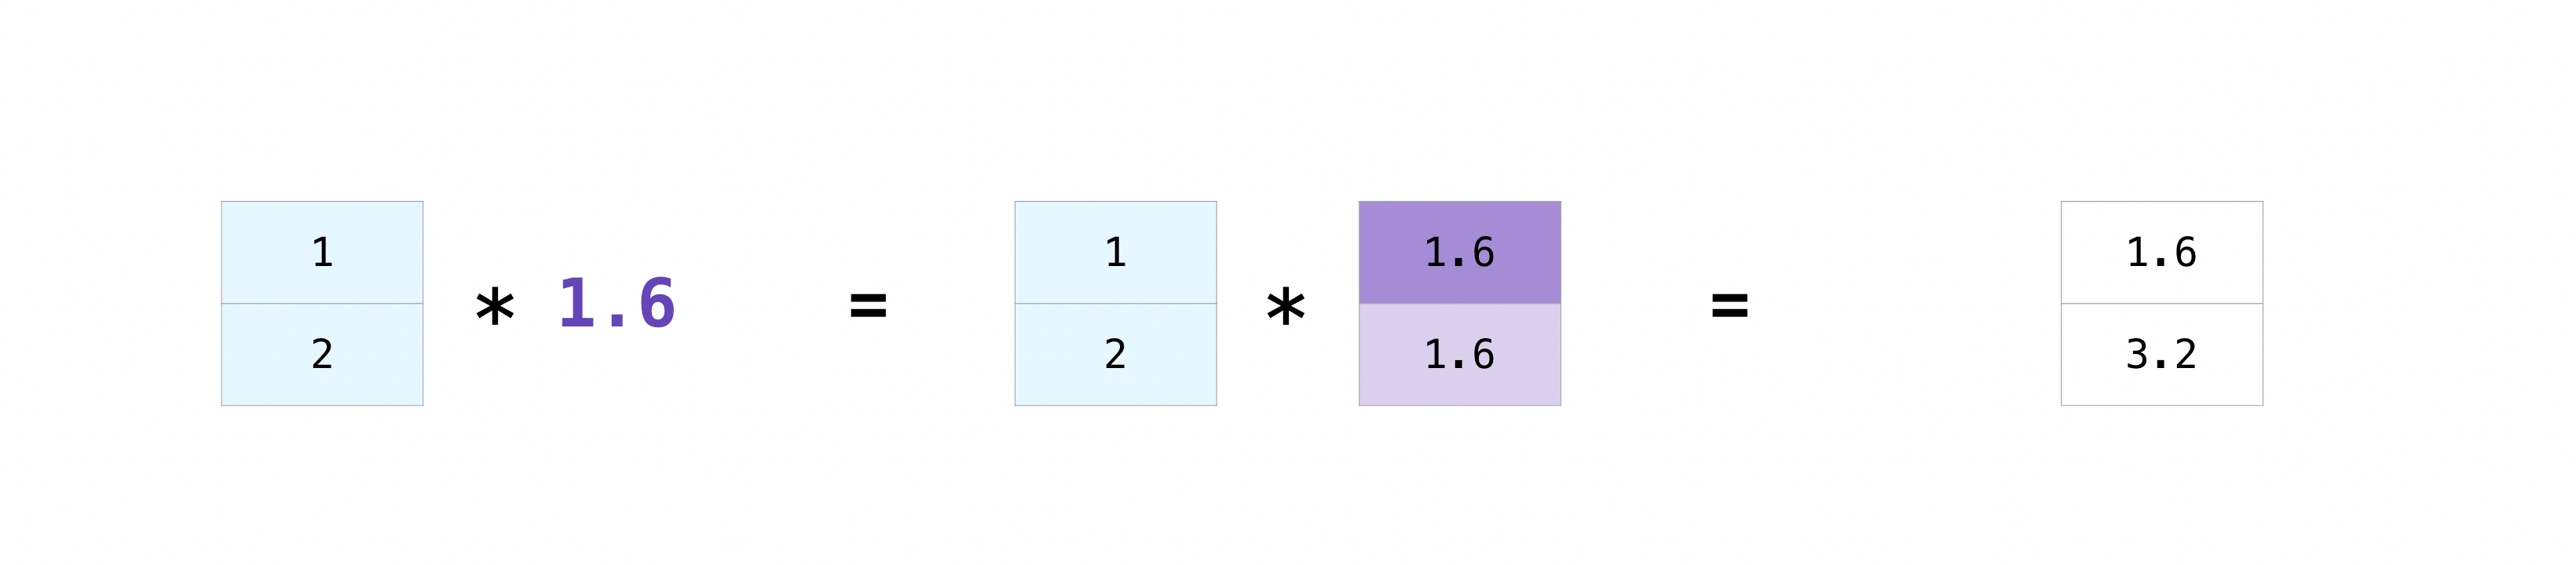

In [171]:
Image('../figures/numpy/np_multiply_broadcasting.png') 

# Let's start with this array, called "a" :

In [172]:
a = np.array([[0.45053314, 0.17296777, 0.34376245, 0.5510652],
              [0.54627315, 0.05093587, 0.40067661, 0.55645993],
              [0.12697628, 0.82485143, 0.26590556, 0.56917101]])

It's very common to want to aggregate along a row or column. By default,
every NumPy aggregation function will return the aggregate of the entire
array. To find the sum or the minimum of the elements in your array,
run:

In [173]:
a.sum()

4.8595784

Or:

In [174]:
a.min()

0.05093587

You can specify on which axis you want the aggregation function to be
computed. For example, you can find the minimum value within each column
by specifying `axis=0`. :

In [175]:
a.min(axis=0)

array([0.12697628, 0.05093587, 0.26590556, 0.5510652 ])

The four values listed above correspond to the number of columns in your
array. With a four-column array, you will get four values as your
result.

Read more about `array methods here <array.ndarray.methods>`.

## Creating matrices

You can pass Python lists of lists to create a 2-D array (or "matrix")
to represent them in NumPy. :

In [176]:
data = np.array([[1, 2], [3, 4], [5, 6]])
data

array([[1, 2],
       [3, 4],
       [5, 6]])

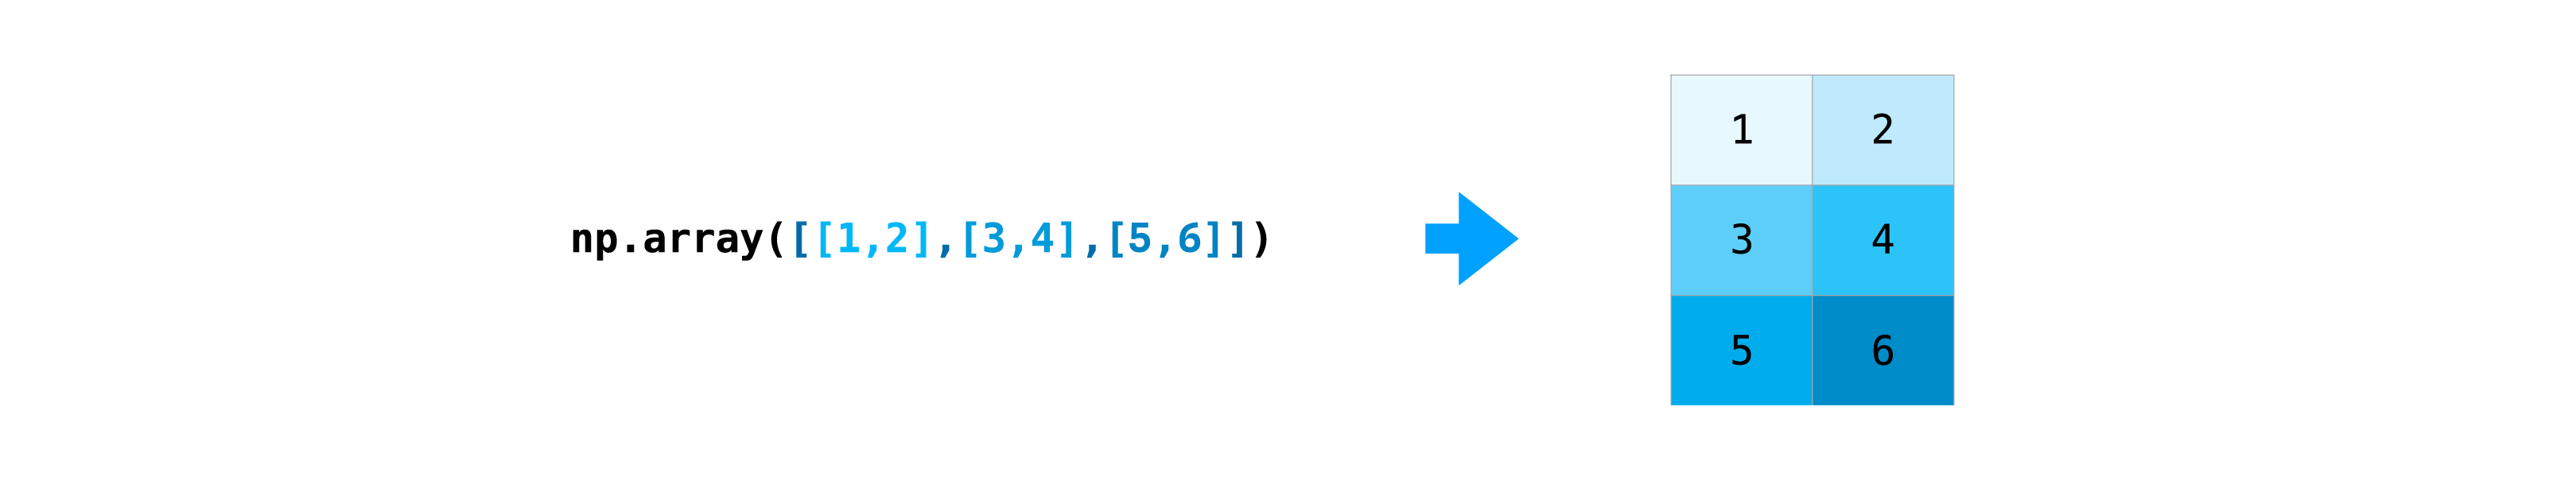

In [178]:
 Image('../figures/numpy/np_create_matrix.png') 

# Indexing and slicing operations are useful when you're manipulating matrices:

In [179]:
data[0, 1]

2

In [180]:
data[1:3]

array([[3, 4],
       [5, 6]])

In [ ]:
data[0:2, 0]

array([1, 3])

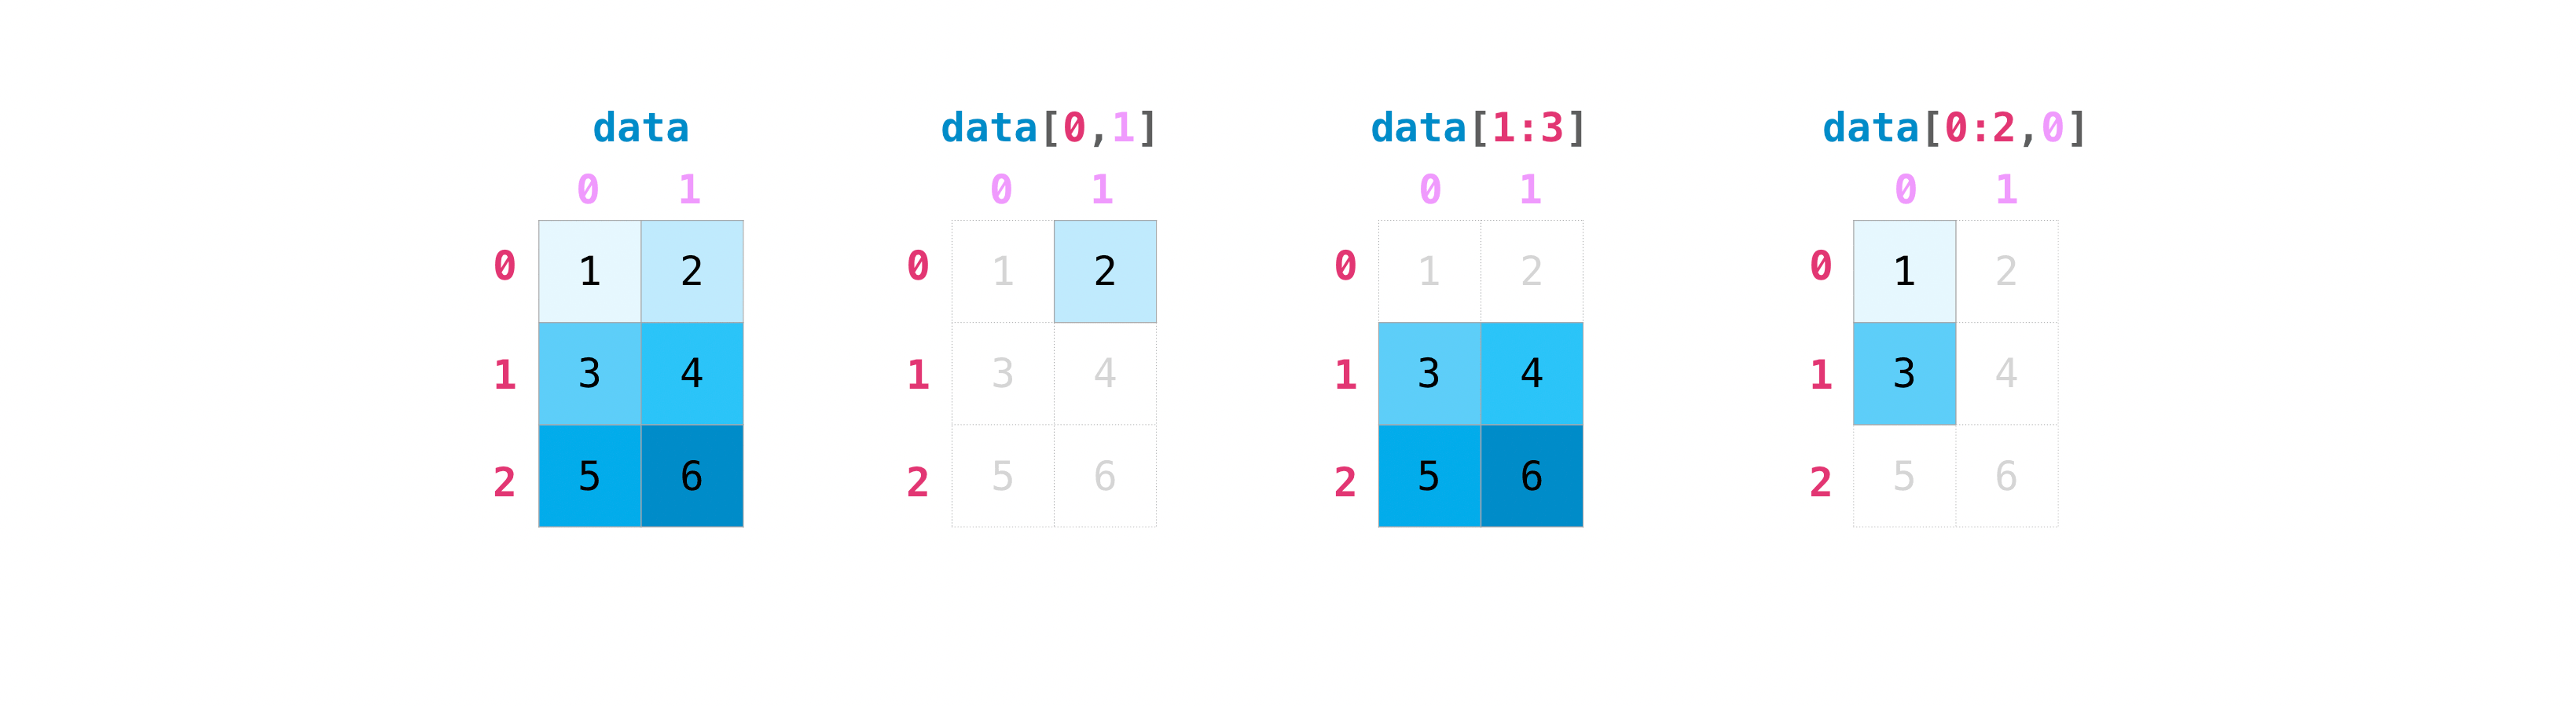

In [181]:
Image('../figures/numpy/np_matrix_indexing.png') 

# You can aggregate matrices the same way you aggregated vectors:

In [182]:
data.max()

6

In [183]:
data.min()

1

In [184]:
data.sum()

21

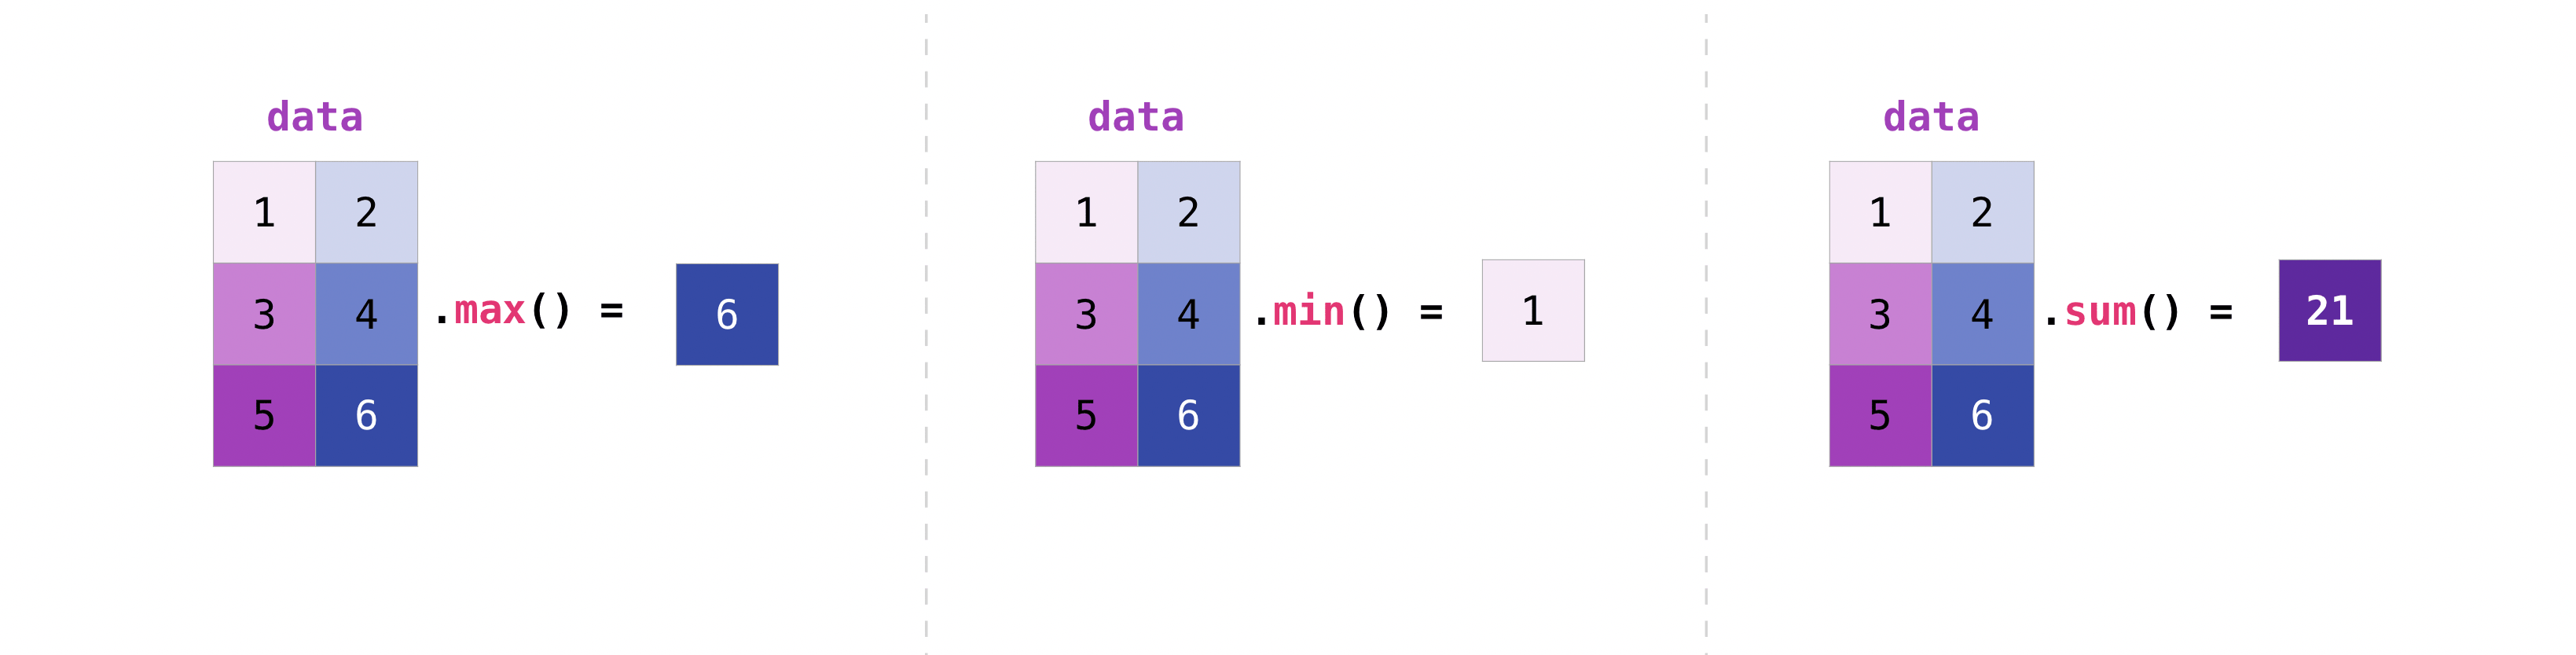

In [185]:
Image('../figures/numpy/np_matrix_aggregation.png') 

# You can aggregate all the values in a matrix and you can aggregate them
# across columns or rows using the `axis` parameter. To illustrate this
# point, let's look at a slightly modified dataset:

In [186]:
data = np.array([[1, 2], [5, 3], [4, 6]])
data

array([[1, 2],
       [5, 3],
       [4, 6]])

In [187]:
data.max(axis=0)

array([5, 6])

In [188]:
data.max(axis=1)

array([2, 5, 6])

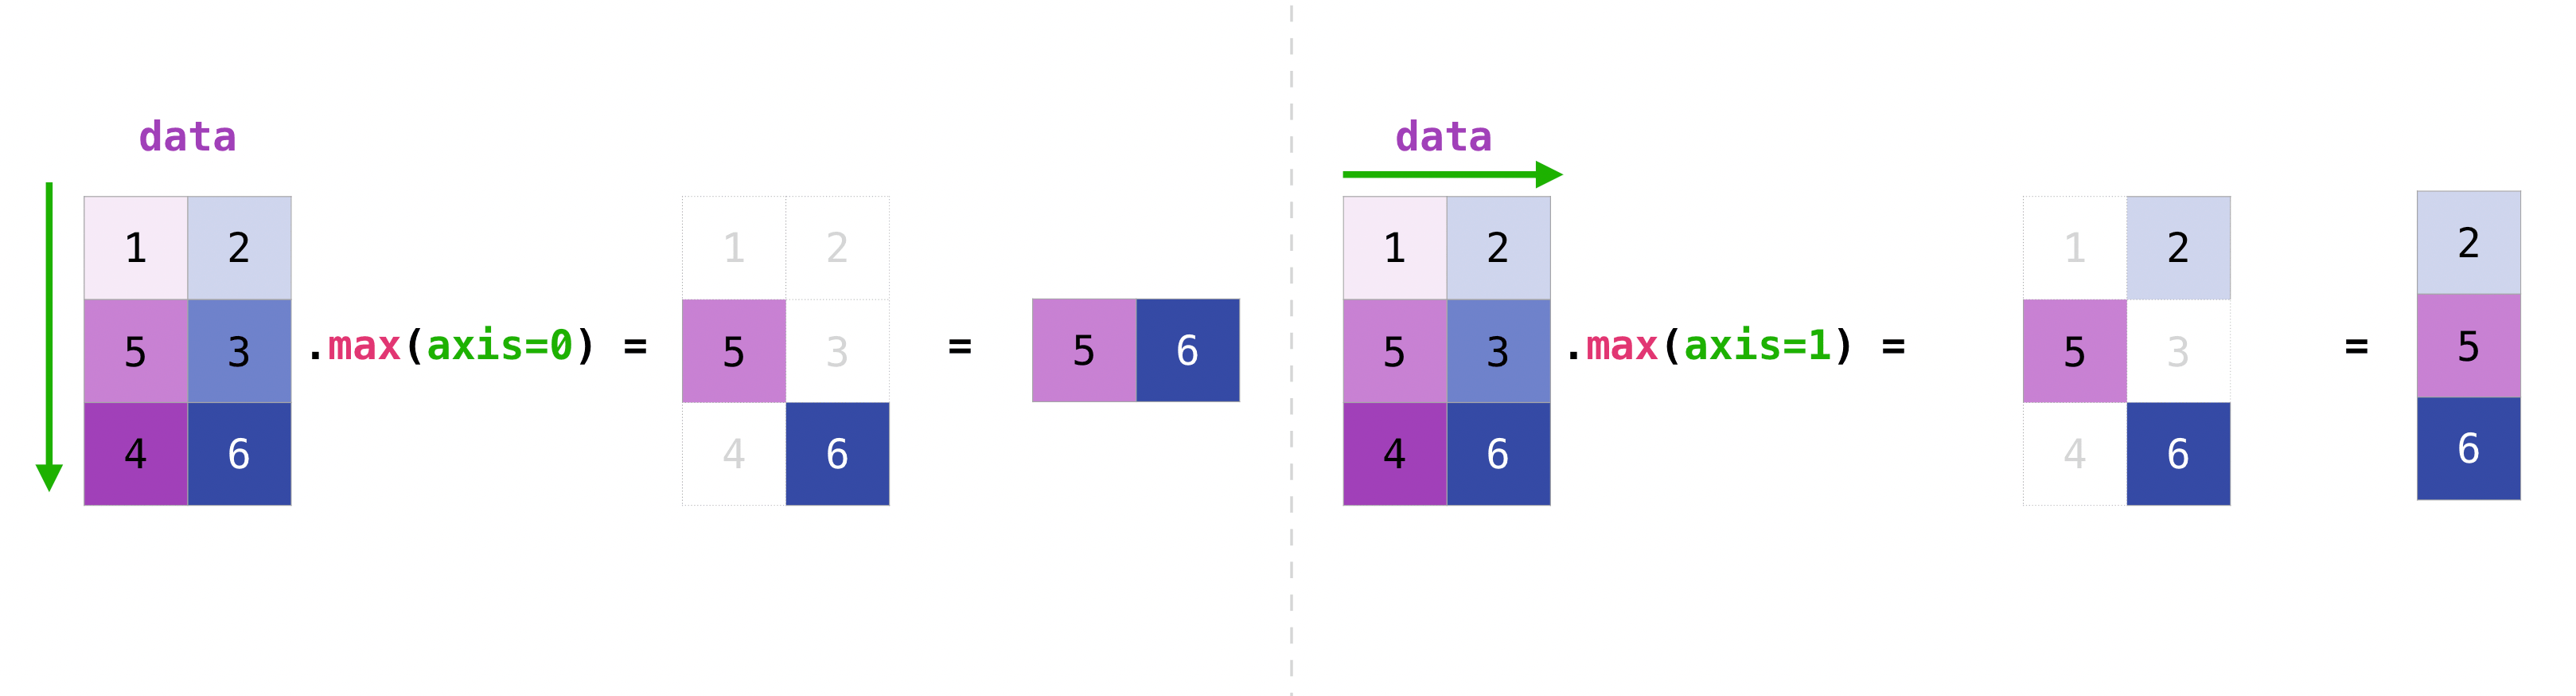

In [192]:
Image('../figures/numpy/np_matrix_aggregation_row.png') 

# Once you've created your matrices, you can add and multiply them using
# arithmetic operators if you have two matrices that are the same size. :

In [193]:
data = np.array([[1, 2], [3, 4]])
ones = np.array([[1, 1], [1, 1]])
data + ones

array([[2, 3],
       [4, 5]])

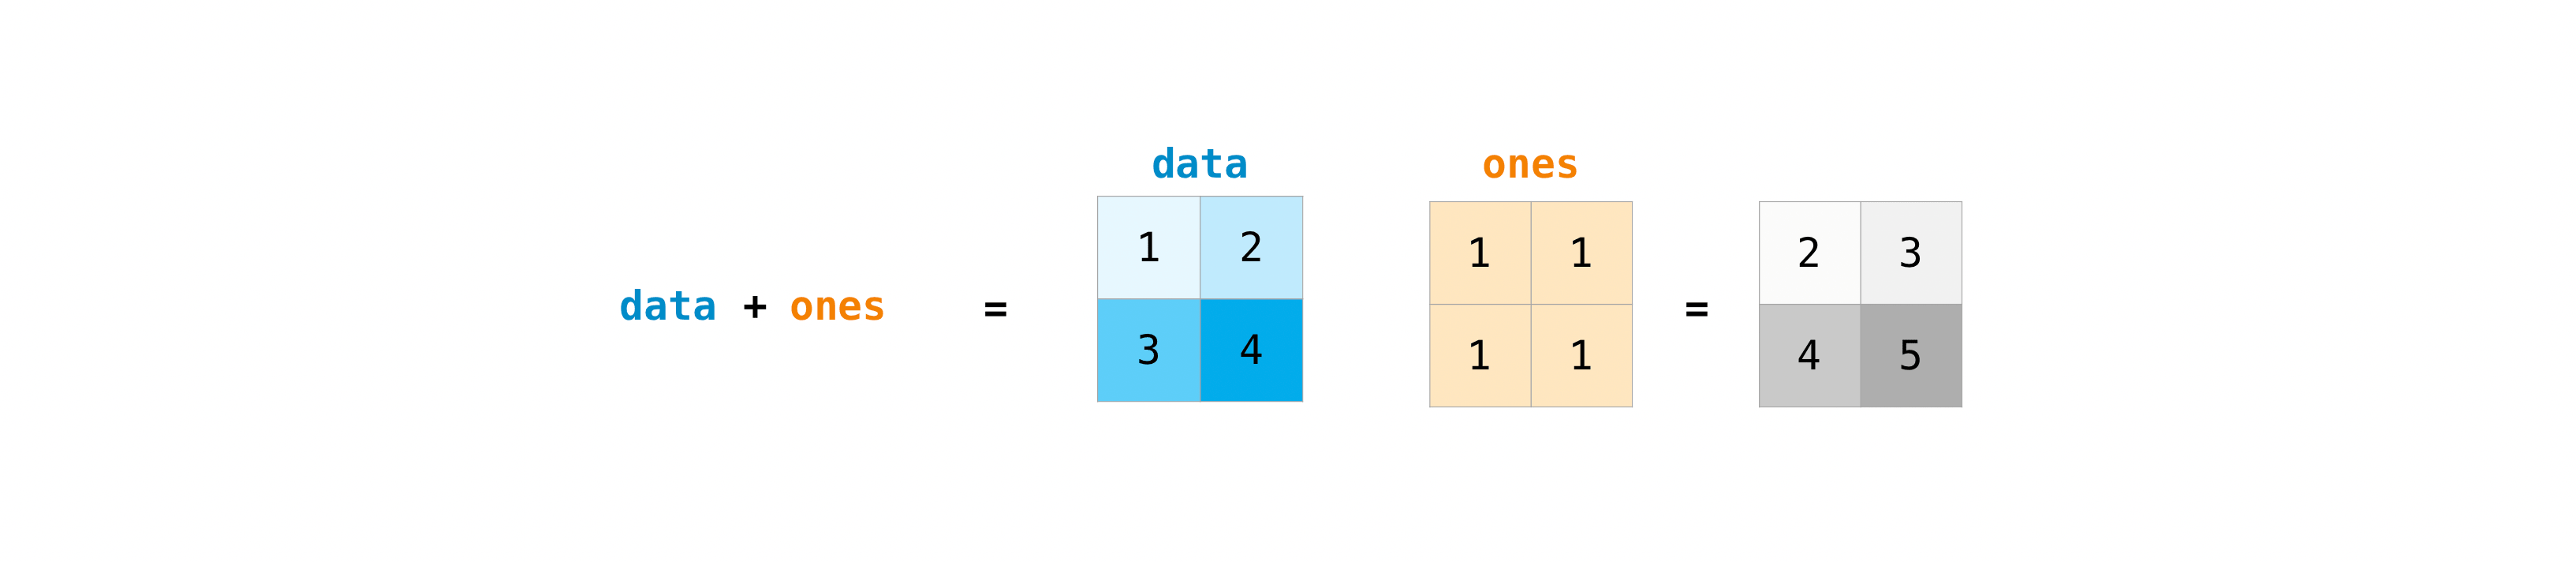

In [194]:
Image('../figures/numpy/np_matrix_arithmetic.png') 

# You can do these arithmetic operations on matrices of different sizes,
# but only if one matrix has only one column or one row. In this case,
# NumPy will use its broadcast rules for the operation. :

In [195]:
data = np.array([[1, 2], [3, 4], [5, 6]])
ones_row = np.array([[1, 1]])
data + ones_row

array([[2, 3],
       [4, 5],
       [6, 7]])

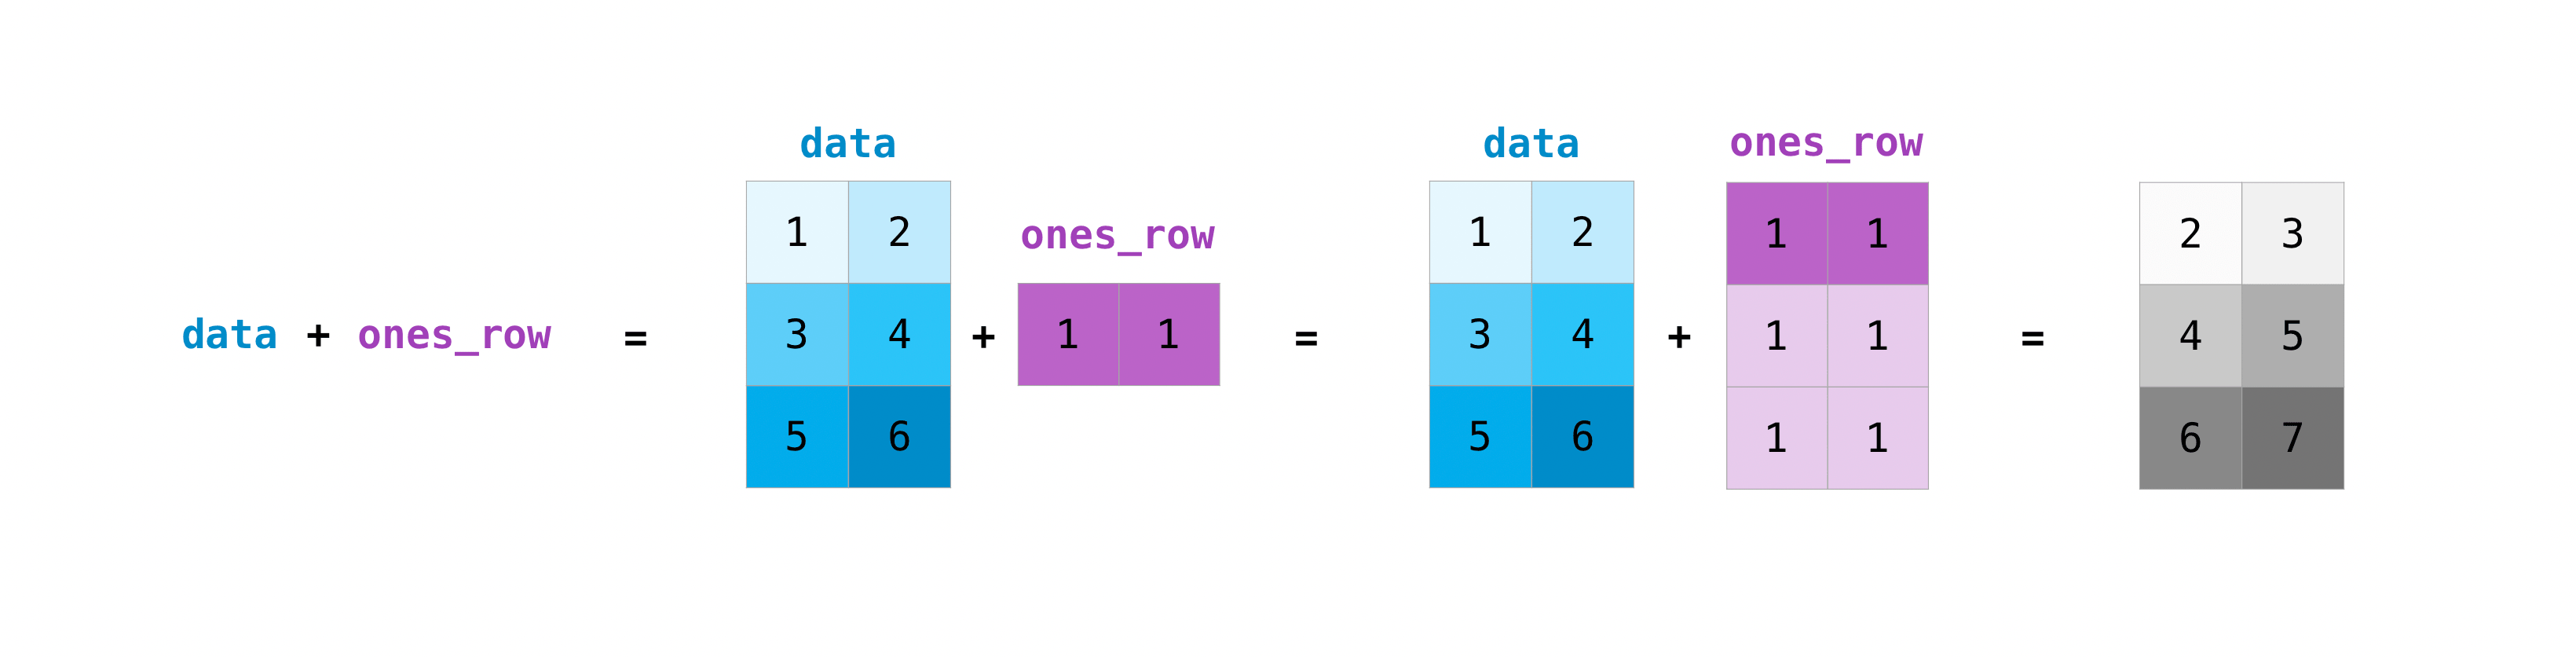

In [196]:
Image('../figures/numpy/np_matrix_broadcasting.png') 

# Be aware that when NumPy prints N-dimensional arrays, the last axis is
# looped over the fastest while the first axis is the slowest. For
# instance:

In [197]:
np.ones((4, 3, 2))

array([[[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]],

       [[1., 1.],
        [1., 1.],
        [1., 1.]]])

There are often instances where we want NumPy to initialize the values
of an array. NumPy offers functions like `ones()` and `zeros()`, and the
`random.Generator` class for random number generation for that. All you
need to do is pass in the number of elements you want it to generate:

In [198]:
np.ones(3)

array([1., 1., 1.])

In [199]:
np.zeros(3)

array([0., 0., 0.])

In [200]:
rng = np.random.default_rng()  # the simplest way to generate random numbers
rng.random(3) #doctest: +SKIP

array([0.44527623, 0.26924817, 0.875564  ])

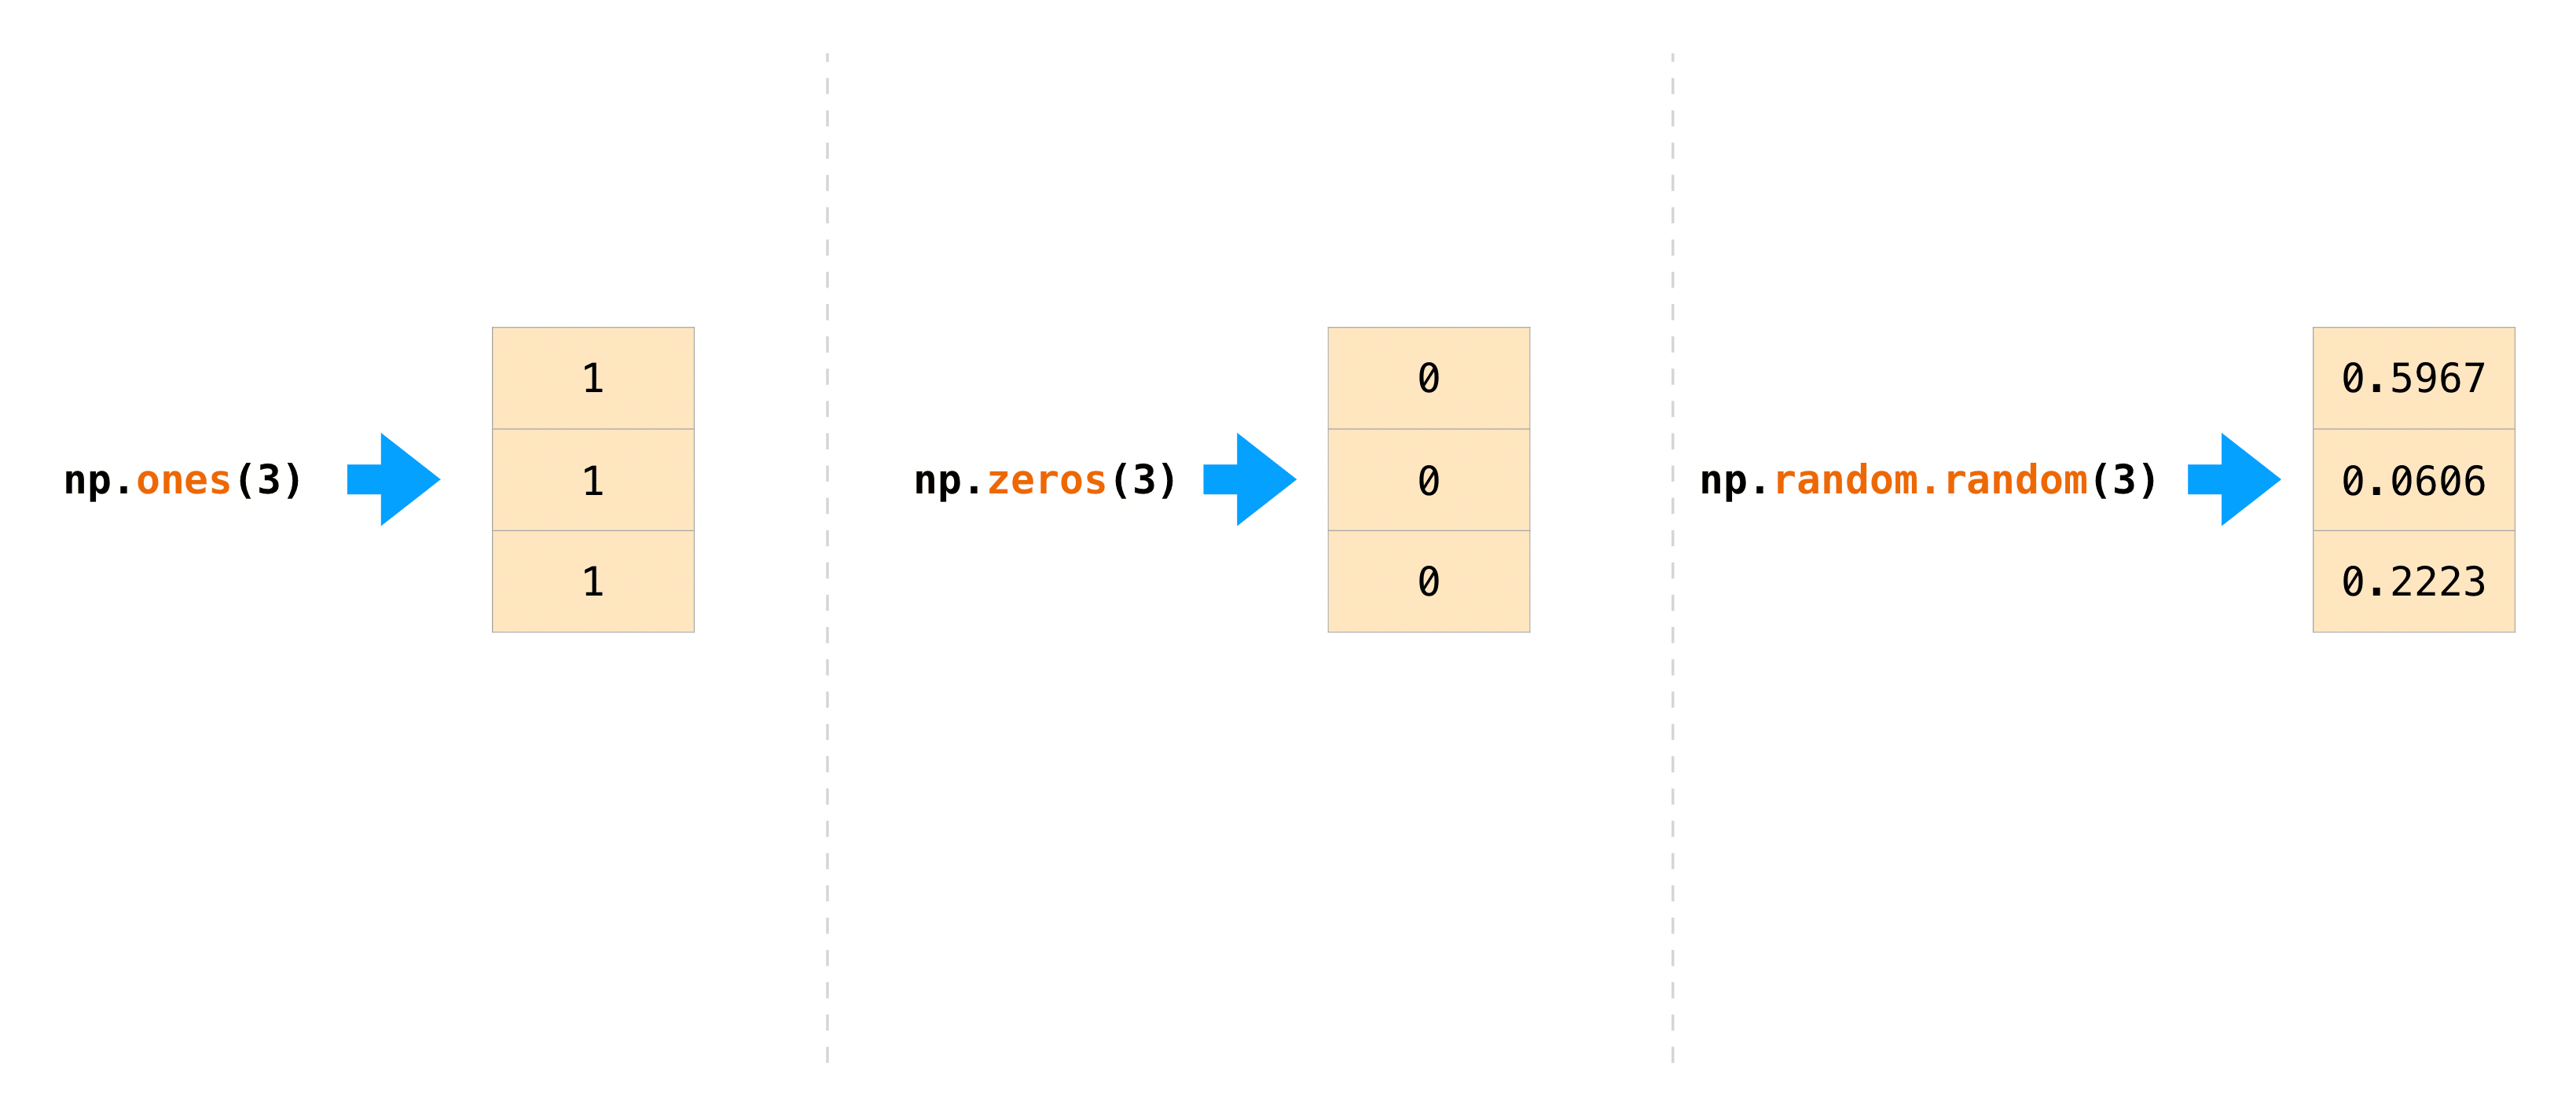

In [201]:
Image('../figures/numpy/np_ones_zeros_random.png') 
 

You can also use `ones()`, `zeros()`, and `random()` to create a 2D
array if you give them a tuple describing the dimensions of the matrix:

In [202]:
np.ones((3, 2))

array([[1., 1.],
       [1., 1.],
       [1., 1.]])

In [203]:
np.zeros((3, 2))

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [205]:
rng.random((3, 2)) #doctest: +SKIP

array([[0.07094774, 0.10125469],
       [0.40896453, 0.16839364],
       [0.24850186, 0.53919176]])

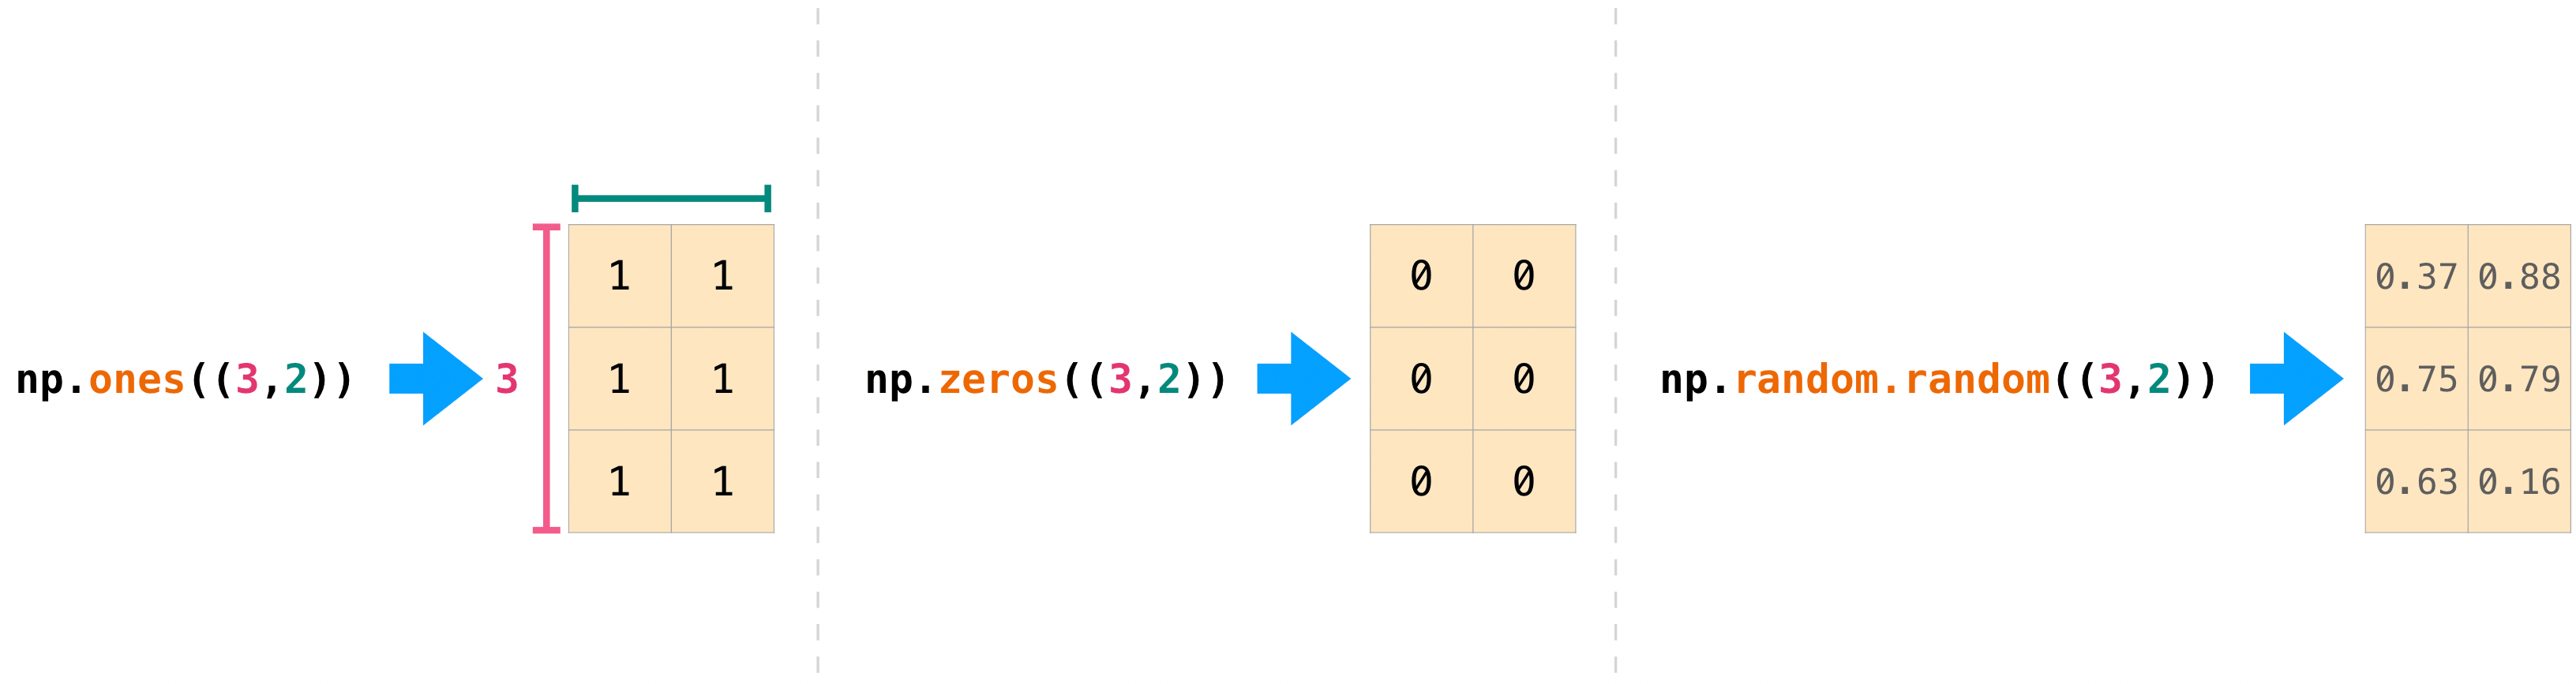

In [211]:

Image('../figures/numpy/np_ones_zeros_matrix.png') 

Read more about creating arrays, filled with `0`'s, `1`'s, other values
or uninitialized, at
`array creation routines <routines.array-creation>`.

## Generating random numbers

The use of random number generation is an important part of the
configuration and evaluation of many numerical and machine learning
algorithms. Whether you need to randomly initialize weights in an
artificial neural network, split data into random sets, or randomly
shuffle your dataset, being able to generate random numbers (actually,
repeatable pseudo-random numbers) is essential.

With `Generator.integers`, you can generate random integers from low
(remember that this is inclusive with NumPy) to high (exclusive). You
can set `endpoint=True` to make the high number inclusive.

You can generate a 2 x 4 array of random integers between 0 and 4 with:

In [212]:
rng.integers(5, size=(2, 4)) #doctest: +SKIP

array([[4, 0, 0, 4],
       [2, 2, 2, 1]])

[Read more about random number generation here](numpyrandom.ipynb).

## How to get unique items and counts

*This section covers* `np.unique()`

------------------------------------------------------------------------

You can find the unique elements in an array easily with `np.unique`.

For example, if you start with this array:

In [213]:
a = np.array([11, 11, 12, 13, 14, 15, 16, 17, 12, 13, 11, 14, 18, 19, 20])

you can use `np.unique` to print the unique values in your array:

In [214]:
unique_values = np.unique(a)
print(unique_values)

[11 12 13 14 15 16 17 18 19 20]


To get the indices of unique values in a NumPy array (an array of first
index positions of unique values in the array), just pass the
`return_index` argument in `np.unique()` as well as your array. :

In [215]:
unique_values, indices_list = np.unique(a, return_index=True)
print(indices_list)

[ 0  2  3  4  5  6  7 12 13 14]


You can pass the `return_counts` argument in `np.unique()` along with
your array to get the frequency count of unique values in a NumPy array.
:

In [216]:
unique_values, occurrence_count = np.unique(a, return_counts=True)
print(occurrence_count)

[3 2 2 2 1 1 1 1 1 1]


This also works with 2D arrays! If you start with this array:

In [217]:
a_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [1, 2, 3, 4]])

You can find unique values with:

In [218]:
unique_values = np.unique(a_2d)
print(unique_values)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


If the axis argument isn't passed, your 2D array will be flattened.

If you want to get the unique rows or columns, make sure to pass the
`axis` argument. To find the unique rows, specify `axis=0` and for
columns, specify `axis=1`. :

In [219]:
unique_rows = np.unique(a_2d, axis=0)
print(unique_rows)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


To get the unique rows, index position, and occurrence count, you can
use:

In [220]:
unique_rows, indices, occurrence_count = np.unique(
     a_2d, axis=0, return_counts=True, return_index=True)
print(unique_rows)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [221]:
print(indices)

[0 1 2]


In [222]:
print(occurrence_count)

[2 1 1]


To learn more about finding the unique elements in an array, see
$unique$.

## Transposing and reshaping a matrix

*This section covers* `arr.reshape()`, `arr.transpose()`, `arr.T`

------------------------------------------------------------------------

It's common to need to transpose your matrices. NumPy arrays have the
property `T` that allows you to transpose a matrix.

![image](images/np_transposing_reshaping.png)

You may also need to switch the dimensions of a matrix. This can happen
when, for example, you have a model that expects a certain input shape
that is different from your dataset. This is where the `reshape` method
can be useful. You simply need to pass in the new dimensions that you
want for the matrix. :

In [ ]:
data.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

In [223]:
data.reshape(3, 2)

array([[1, 2],
       [3, 4],
       [5, 6]])

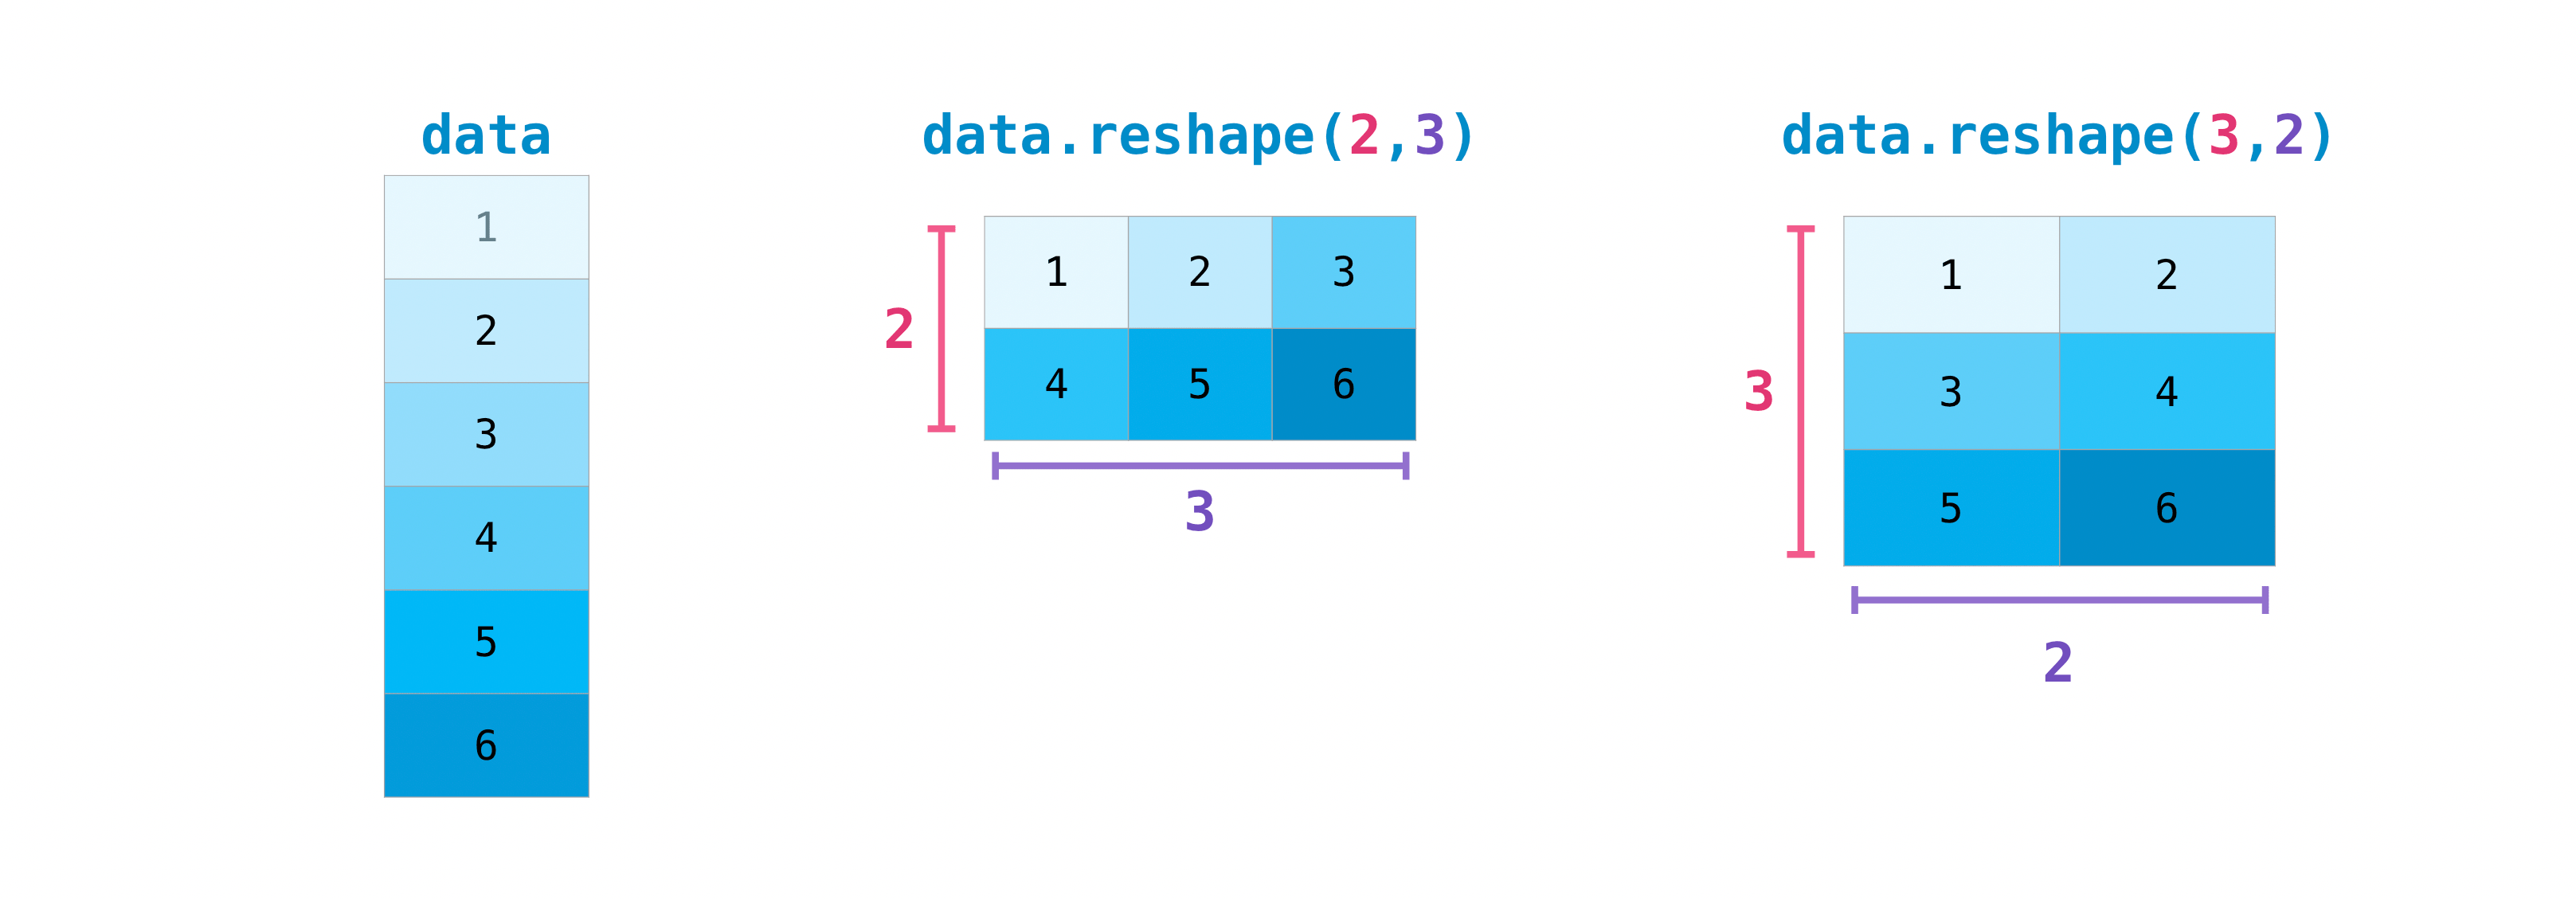

In [224]:

Image('../figures/numpy/np_reshape.png') 



You can also use `.transpose()` to reverse or change the axes of an
array according to the values you specify.

If you start with this array:

In [225]:
arr = np.arange(6).reshape((2, 3))
arr

array([[0, 1, 2],
       [3, 4, 5]])

You can transpose your array with `arr.transpose()`. :

In [226]:
arr.transpose()

array([[0, 3],
       [1, 4],
       [2, 5]])

You can also use `arr.T` :

In [227]:
arr.T

array([[0, 3],
       [1, 4],
       [2, 5]])

To learn more about transposing and reshaping arrays, see $transpose$
and $reshape$.

## How to reverse an array

*This section covers* `np.flip()`

------------------------------------------------------------------------

NumPy's `np.flip()` function allows you to flip, or reverse, the
contents of an array along an axis. When using `np.flip()`, specify the
array you would like to reverse and the axis. If you don't specify the
axis, NumPy will reverse the contents along all of the axes of your
input array.

**Reversing a 1D array**

If you begin with a 1D array like this one:

In [228]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

You can reverse it with:

In [229]:
reversed_arr = np.flip(arr)

If you want to print your reversed array, you can run:

In [230]:
print('Reversed Array: ', reversed_arr)

Reversed Array:  [8 7 6 5 4 3 2 1]


**Reversing a 2D array**

A 2D array works much the same way.

If you start with this array:

In [231]:
arr_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

You can reverse the content in all of the rows and all of the columns
with:

In [232]:
reversed_arr = np.flip(arr_2d)
print(reversed_arr)

[[12 11 10  9]
 [ 8  7  6  5]
 [ 4  3  2  1]]


You can easily reverse only the *rows* with:

In [233]:
reversed_arr_rows = np.flip(arr_2d, axis=0)
print(reversed_arr_rows)

[[ 9 10 11 12]
 [ 5  6  7  8]
 [ 1  2  3  4]]


Or reverse only the *columns* with:

In [234]:
reversed_arr_columns = np.flip(arr_2d, axis=1)
print(reversed_arr_columns)

[[ 4  3  2  1]
 [ 8  7  6  5]
 [12 11 10  9]]


You can also reverse the contents of only one column or row. For
example, you can reverse the contents of the row at index position 1
(the second row):

In [235]:
arr_2d[1] = np.flip(arr_2d[1])
print(arr_2d)

[[ 1  2  3  4]
 [ 8  7  6  5]
 [ 9 10 11 12]]


You can also reverse the column at index position 1 (the second column):

In [236]:
arr_2d[:,1] = np.flip(arr_2d[:,1])
print(arr_2d)

[[ 1 10  3  4]
 [ 8  7  6  5]
 [ 9  2 11 12]]


Read more about reversing arrays at $flip$.

## Reshaping and flattening multidimensional arrays

*This section covers* `.flatten()`, `ravel()`

------------------------------------------------------------------------

There are two popular ways to flatten an array: `.flatten()` and
`.ravel()`. The primary difference between the two is that the new array
created using `ravel()` is actually a reference to the parent array
(i.e., a "view"). This means that any changes to the new array will
affect the parent array as well. Since `ravel` does not create a copy,
it's memory efficient.

If you start with this array:

In [237]:
x = np.array([[1 , 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

You can use `flatten` to flatten your array into a 1D array. :

In [238]:
x.flatten()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

When you use `flatten`, changes to your new array won't change the
parent array.

For example:

In [239]:
a1 = x.flatten()
a1[0] = 99
print(x)  # Original array

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [240]:
print(a1)  # New array

[99  2  3  4  5  6  7  8  9 10 11 12]


But when you use `ravel`, the changes you make to the new array will
affect the parent array.

For example:

In [241]:
a2 = x.ravel()
a2[0] = 98
print(x)  # Original array

[[98  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [251]:
print(a2)  # New array

[98  2  3  4  5  6  7  8  9 10 11 12]


## How to save and load NumPy objects



You will, at some point, want to save your arrays to disk and load them back without having to re-run the code. Fortunately, there are several ways to save and load objects with NumPy. The ndarray objects can be saved to and loaded from the disk files with loadtxt and savetxt functions that handle normal text files, load and save functions that handle NumPy binary files with a .npy file extension, and a savez function that handles NumPy files with a .npz file extension.

The .npy and .npz files store data, shape, dtype, and other information required to reconstruct the ndarray in a way that allows the array to be correctly retrieved, even when the file is on another machine with different architecture.

If you want to store a single ndarray object, store it as a .npy file using np.save. If you want to store more than one ndarray object in a single file, save it as a .npz file using np.savez. You can also save several arrays into a single file in compressed npz format with savez_compressed.

It’s easy to save and load and array with np.save(). Just make sure to specify the array you want to save and a file name. For example, if you create this array:

In [253]:
a = np.array([1, 2, 3, 4, 5, 6])

You can save it as "filename.npy" with:

In [254]:
np.save('filename', a)

You can use `np.load()` to reconstruct your array. :

In [255]:
b = np.load('filename.npy')

If you want to check your array, you can run:

In [256]:
print(b)

[1 2 3 4 5 6]


You can save a NumPy array as a plain text file like a **.csv** or
**.txt** file with `np.savetxt`.

For example, if you create this array:

In [257]:
csv_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

You can easily save it as a .csv file with the name "new_file.csv" like
this:

In [258]:
np.savetxt('new_file.csv', csv_arr)

You can quickly and easily load your saved text file using `loadtxt()` :

In [259]:
np.loadtxt('new_file.csv')

array([1., 2., 3., 4., 5., 6., 7., 8.])

The `savetxt()` and `loadtxt()` functions accept additional optional
parameters such as header, footer, and delimiter. While text files can
be easier for sharing, .npy and .npz files are smaller and faster to
read. If you need more sophisticated handling of your text file (for
example, if you need to work with lines that contain missing values),
you will want to use the $genfromtxt$ function.

With $savetxt$, you can specify headers, footers, comments, and more.

Learn more about `input and output routines here <routines.io>`.

## Importing and exporting a CSV

It's simple to read in a CSV that contains existing information. The
best and easiest way to do this is to use
[Pandas](https://pandas.pydata.org). :

## Plotting arrays with Matplotlib

If you need to generate a plot for your values, it's very simple with
[Matplotlib](https://matplotlib.org/).

For example, you may have an array like this one:

In [262]:
a = np.array([2, 1, 5, 7, 4, 6, 8, 14, 10, 9, 18, 20, 22])

If you already have Matplotlib installed, you can import it with:

In [263]:
import matplotlib.pyplot as plt

In [264]:
# If you're using Jupyter Notebook, you may also want to run the following
# line of code to display your code in the notebook:

%matplotlib inline

All you need to do to plot your values is run:

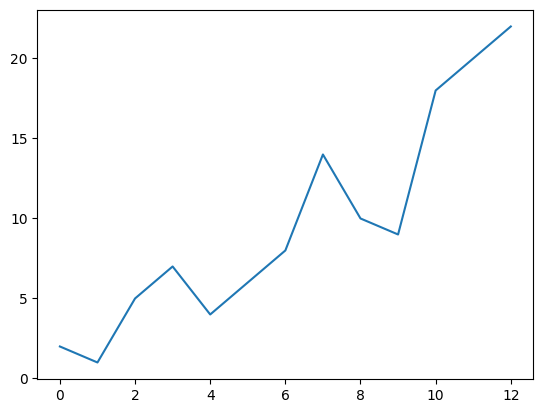

In [265]:
plt.plot(a)

In [266]:
# If you are running from a command line, you may need to do this:
# >>> plt.show()

<div class="plot" align="center" include-source="0">

user/plots/matplotlib1.py

</div>

For example, you can plot a 1D array like this:

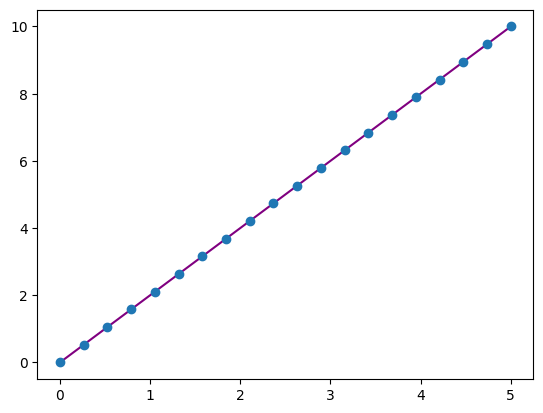

In [267]:
x = np.linspace(0, 5, 20)
y = np.linspace(0, 10, 20)
plt.plot(x, y, 'purple') # line
plt.plot(x, y, 'o')      # dots

<div class="plot" align="center" include-source="0">

user/plots/matplotlib2.py

</div>

With Matplotlib, you have access to an enormous number of visualization
options. :

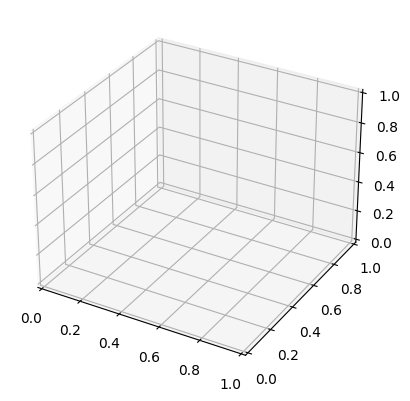

In [268]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = np.arange(-5, 5, 0.15)
Y = np.arange(-5, 5, 0.15)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

In [269]:
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')

<div class="plot" align="center" include-source="0">

user/plots/matplotlib3.py

</div>

To read more about Matplotlib and what it can do, take a look at [the
official documentation](https://matplotlib.org/). For directions
regarding installing Matplotlib, see the official [installation
section](https://matplotlib.org/users/installing.html).

------------------------------------------------------------------------

*Image credits: Jay Alammar https://jalammar.github.io/*